***
*Project:* Helmholtz Machine on Niche Construction

*Author:* Jingwei Liu, Computer Music Ph.D., UC San Diego
***

# <span style="background-color:darkorange; color:white; padding:2px 6px">Experiment 4_5</span> 

# Helmholtz Machine on Mutual Information Algorithm


*Created:* December 29, 2023

*Updated:* December 31, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

In [11]:
structure = [[10,8,6,3,1]]
n_dz = np.array(structure)
n_dz

array([[10,  8,  6,  3,  1]])

In [12]:
Phi, Theta = ut.parameter_initialization("zero",n_dz)  # "zero" or "random"

In [13]:
value_set = [1,0]
activation_type = "tanh"
bias = [False,False,False] # [instantiation bias, MLP bias,data bias]

In [20]:
n = n_dz[0,0]
k = 3
n_data = 300
random_set = ut.random_generate(k,n,n_data,value_set)
random_set

array([[1, 1, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 1, 1]])

In [21]:
values,counts = np.unique(random_set, axis=1, return_counts = True)
counts.size

249

In [22]:
dataset = values
entire_set = ut.all_comb(n, value_set)

In [23]:
reordered_set = ut.reorder_all_comb(entire_set,dataset)
reordered_set

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

Train the model:

In [56]:
lr = 0.01
epoch = 2000
n_data = dataset.shape[1]
n_layer = n_dz.shape[1]

In [57]:
### Pre-training without constraints, accuracy 0.33, not ideal

for e in range (epoch):
    index = np.random.permutation(n_data)
    Loss_Q_total = np.zeros(n_layer)
    Loss_P_total = np.zeros(n_layer)
    for i in range(n_data):
        d0 = dataset[:,index[i]:index[i]+1]
        Alpha_Q = ut.wake_sample(n_dz,d0,value_set,Phi,activation_type,bias)
        Theta,Loss_P = ut.sleep_update_delta(Theta,Alpha_Q,lr,n_dz,value_set,activation_type,bias)
        Alpha_P = ut.sleep_sample(n_dz,value_set,Theta,activation_type,bias)
        Phi,Loss_Q = ut.wake_update_delta(Phi,Alpha_P,lr,n_dz,value_set,activation_type,bias)
        
        Loss_Q_total += Loss_Q
        Loss_P_total += Loss_P
    Loss_Q_total = Loss_Q_total/n_data
    Loss_P_total = Loss_P_total/n_data
    print('Loss_Q: '+ str(np.around(Loss_Q_total,2)), 'Loss_P: '+ str(np.around(Loss_P_total,2)))

Loss_Q: [2.18 2.26 1.2  0.   5.65] Loss_P: [ 3.83  2.43  2.88  1.28 10.41]
Loss_Q: [2.1  2.37 1.2  0.   5.66] Loss_P: [ 3.84  2.46  2.91  1.22 10.43]
Loss_Q: [2.11 2.3  1.19 0.   5.59] Loss_P: [ 3.85  2.45  2.87  1.27 10.45]
Loss_Q: [2.18 2.31 1.17 0.   5.66] Loss_P: [ 3.77  2.49  2.86  1.27 10.38]
Loss_Q: [2.15 2.33 1.19 0.   5.66] Loss_P: [ 3.78  2.48  2.9   1.27 10.43]
Loss_Q: [2.16 2.24 1.23 0.   5.63] Loss_P: [ 3.8   2.54  2.9   1.26 10.51]
Loss_Q: [2.13 2.31 1.22 0.   5.67] Loss_P: [ 3.83  2.55  2.89  1.27 10.53]
Loss_Q: [2.17 2.27 1.18 0.   5.63] Loss_P: [ 3.78  2.46  2.88  1.27 10.39]
Loss_Q: [2.2  2.28 1.22 0.   5.7 ] Loss_P: [ 3.8   2.51  2.89  1.24 10.44]
Loss_Q: [2.19 2.37 1.25 0.   5.81] Loss_P: [ 3.8   2.54  2.9   1.27 10.5 ]
Loss_Q: [2.12 2.31 1.21 0.   5.64] Loss_P: [ 3.77  2.45  2.92  1.27 10.41]
Loss_Q: [2.1  2.33 1.23 0.   5.65] Loss_P: [ 3.76  2.49  2.92  1.28 10.45]
Loss_Q: [2.2  2.33 1.24 0.   5.77] Loss_P: [ 3.84  2.42  2.94  1.25 10.46]
Loss_Q: [2.24 2.34 1.24 0

Loss_Q: [2.13 2.21 1.28 0.   5.62] Loss_P: [ 3.8   2.49  2.79  1.35 10.43]
Loss_Q: [2.14 2.25 1.27 0.   5.66] Loss_P: [ 3.82  2.45  2.77  1.38 10.42]
Loss_Q: [2.09 2.21 1.27 0.   5.58] Loss_P: [ 3.86  2.43  2.74  1.34 10.37]
Loss_Q: [2.1  2.27 1.31 0.   5.68] Loss_P: [ 3.8   2.44  2.77  1.36 10.38]
Loss_Q: [2.16 2.29 1.31 0.   5.76] Loss_P: [ 3.81  2.45  2.81  1.35 10.43]
Loss_Q: [2.14 2.28 1.32 0.   5.74] Loss_P: [ 3.78  2.52  2.79  1.36 10.45]
Loss_Q: [2.24 2.23 1.29 0.   5.76] Loss_P: [ 3.79  2.5   2.8   1.34 10.43]
Loss_Q: [2.12 2.24 1.26 0.   5.62] Loss_P: [ 3.83  2.54  2.82  1.38 10.57]
Loss_Q: [2.18 2.2  1.33 0.   5.71] Loss_P: [ 3.82  2.51  2.83  1.34 10.5 ]
Loss_Q: [2.22 2.27 1.3  0.   5.79] Loss_P: [ 3.81  2.5   2.84  1.38 10.53]
Loss_Q: [2.19 2.26 1.34 0.   5.79] Loss_P: [ 3.84  2.49  2.81  1.39 10.52]
Loss_Q: [2.21 2.25 1.34 0.   5.8 ] Loss_P: [ 3.82  2.51  2.81  1.4  10.54]
Loss_Q: [2.21 2.17 1.36 0.   5.74] Loss_P: [ 3.89  2.51  2.79  1.4  10.6 ]
Loss_Q: [2.19 2.26 1.34 0

Loss_Q: [2.11 2.19 1.15 0.   5.45] Loss_P: [ 3.84  2.38  2.72  1.18 10.12]
Loss_Q: [2.18 2.2  1.14 0.   5.52] Loss_P: [ 3.84  2.47  2.73  1.17 10.21]
Loss_Q: [2.13 2.21 1.12 0.   5.46] Loss_P: [ 3.79  2.4   2.75  1.17 10.12]
Loss_Q: [2.07 2.22 1.15 0.   5.43] Loss_P: [ 3.86  2.42  2.76  1.19 10.23]
Loss_Q: [2.05 2.23 1.12 0.   5.4 ] Loss_P: [ 3.8   2.45  2.75  1.2  10.2 ]
Loss_Q: [2.14 2.23 1.11 0.   5.48] Loss_P: [ 3.87  2.35  2.76  1.17 10.15]
Loss_Q: [2.02 2.23 1.11 0.   5.37] Loss_P: [ 3.86  2.31  2.73  1.16 10.07]
Loss_Q: [2.19 2.23 1.09 0.   5.51] Loss_P: [ 3.85  2.36  2.78  1.21 10.19]
Loss_Q: [2.17 2.27 1.14 0.   5.58] Loss_P: [ 3.86  2.39  2.74  1.14 10.13]
Loss_Q: [2.07 2.31 1.14 0.   5.52] Loss_P: [ 3.85  2.43  2.81  1.18 10.27]
Loss_Q: [2.05 2.21 1.07 0.   5.33] Loss_P: [ 3.86  2.43  2.77  1.2  10.27]
Loss_Q: [2.06 2.28 1.19 0.   5.53] Loss_P: [ 3.86  2.29  2.73  1.22 10.1 ]
Loss_Q: [2.16 2.16 1.16 0.   5.48] Loss_P: [ 3.85  2.46  2.72  1.23 10.26]
Loss_Q: [2.13 2.26 1.14 0

Loss_Q: [2.25 2.24 1.3  0.   5.79] Loss_P: [ 3.83  2.54  2.74  1.4  10.51]
Loss_Q: [2.26 2.17 1.28 0.   5.7 ] Loss_P: [ 3.89  2.47  2.73  1.37 10.46]
Loss_Q: [2.21 2.28 1.28 0.   5.77] Loss_P: [ 3.94  2.5   2.76  1.38 10.58]
Loss_Q: [2.23 2.24 1.29 0.   5.76] Loss_P: [ 3.9   2.52  2.74  1.35 10.51]
Loss_Q: [2.25 2.22 1.27 0.   5.75] Loss_P: [ 3.93  2.51  2.77  1.36 10.56]
Loss_Q: [2.19 2.26 1.22 0.   5.68] Loss_P: [ 3.81  2.49  2.74  1.35 10.38]
Loss_Q: [2.19 2.24 1.24 0.   5.68] Loss_P: [ 3.91  2.46  2.75  1.35 10.46]
Loss_Q: [2.18 2.21 1.2  0.   5.6 ] Loss_P: [ 3.9   2.48  2.74  1.33 10.44]
Loss_Q: [2.25 2.16 1.2  0.   5.61] Loss_P: [ 3.78  2.44  2.77  1.33 10.32]
Loss_Q: [2.18 2.24 1.19 0.   5.61] Loss_P: [ 3.91  2.45  2.77  1.28 10.41]
Loss_Q: [2.23 2.28 1.2  0.   5.71] Loss_P: [ 3.89  2.41  2.76  1.32 10.39]
Loss_Q: [2.18 2.21 1.23 0.   5.62] Loss_P: [ 3.82  2.51  2.75  1.31 10.39]
Loss_Q: [2.19 2.28 1.19 0.   5.66] Loss_P: [ 3.85  2.41  2.76  1.29 10.32]
Loss_Q: [2.25 2.23 1.19 0

Loss_Q: [2.22 2.21 1.22 0.   5.65] Loss_P: [ 3.84  2.36  2.82  1.31 10.33]
Loss_Q: [2.19 2.23 1.19 0.   5.6 ] Loss_P: [ 3.94  2.41  2.82  1.3  10.46]
Loss_Q: [2.19 2.2  1.22 0.   5.61] Loss_P: [ 3.83  2.47  2.79  1.3  10.39]
Loss_Q: [2.18 2.23 1.25 0.   5.67] Loss_P: [ 3.87  2.33  2.81  1.3  10.31]
Loss_Q: [2.19 2.27 1.23 0.   5.69] Loss_P: [ 3.86  2.42  2.86  1.31 10.44]
Loss_Q: [2.14 2.22 1.22 0.   5.58] Loss_P: [ 3.88  2.37  2.8   1.31 10.36]
Loss_Q: [2.17 2.21 1.24 0.   5.62] Loss_P: [ 3.84  2.45  2.83  1.3  10.43]
Loss_Q: [2.22 2.26 1.17 0.   5.65] Loss_P: [ 3.84  2.44  2.79  1.3  10.36]
Loss_Q: [2.24 2.24 1.22 0.   5.7 ] Loss_P: [ 3.8   2.44  2.85  1.28 10.38]
Loss_Q: [2.18 2.27 1.19 0.   5.64] Loss_P: [ 3.81  2.47  2.83  1.26 10.36]
Loss_Q: [2.17 2.3  1.2  0.   5.67] Loss_P: [ 3.86  2.42  2.85  1.3  10.43]
Loss_Q: [2.19 2.26 1.18 0.   5.63] Loss_P: [ 3.93  2.41  2.86  1.27 10.47]
Loss_Q: [2.23 2.22 1.19 0.   5.63] Loss_P: [ 3.85  2.46  2.82  1.31 10.45]
Loss_Q: [2.27 2.27 1.24 0

Loss_Q: [2.19 2.23 1.2  0.   5.61] Loss_P: [ 3.8   2.35  2.81  1.3  10.25]
Loss_Q: [2.17 2.19 1.18 0.   5.55] Loss_P: [ 3.89  2.44  2.79  1.31 10.43]
Loss_Q: [2.21 2.19 1.19 0.   5.59] Loss_P: [ 3.85  2.47  2.77  1.3  10.4 ]
Loss_Q: [2.1  2.22 1.18 0.   5.51] Loss_P: [ 3.82  2.37  2.78  1.3  10.26]
Loss_Q: [2.08 2.2  1.19 0.   5.47] Loss_P: [ 3.87  2.36  2.83  1.3  10.36]
Loss_Q: [2.22 2.21 1.15 0.   5.58] Loss_P: [ 3.82  2.39  2.8   1.24 10.25]
Loss_Q: [2.19 2.21 1.17 0.   5.56] Loss_P: [ 3.89  2.35  2.77  1.28 10.29]
Loss_Q: [2.2  2.21 1.13 0.   5.54] Loss_P: [ 3.86  2.35  2.78  1.27 10.26]
Loss_Q: [2.19 2.24 1.13 0.   5.56] Loss_P: [ 3.83  2.38  2.79  1.25 10.24]
Loss_Q: [2.13 2.19 1.15 0.   5.47] Loss_P: [ 3.9   2.31  2.75  1.24 10.21]
Loss_Q: [2.19 2.16 1.15 0.   5.5 ] Loss_P: [ 3.92  2.31  2.77  1.24 10.24]
Loss_Q: [2.15 2.22 1.07 0.   5.45] Loss_P: [ 3.93  2.25  2.74  1.24 10.16]
Loss_Q: [2.15 2.22 1.12 0.   5.5 ] Loss_P: [ 3.93  2.24  2.76  1.24 10.16]
Loss_Q: [2.19 2.17 1.2  0

Loss_Q: [2.1  2.09 1.2  0.   5.39] Loss_P: [3.82 2.19 2.72 1.26 9.99]
Loss_Q: [2.13 2.13 1.16 0.   5.41] Loss_P: [ 3.84  2.23  2.77  1.26 10.1 ]
Loss_Q: [2.1  2.17 1.16 0.   5.43] Loss_P: [ 3.83  2.3   2.74  1.27 10.12]
Loss_Q: [2.17 2.13 1.14 0.   5.43] Loss_P: [ 3.79  2.3   2.74  1.25 10.07]
Loss_Q: [2.05 2.13 1.15 0.   5.33] Loss_P: [ 3.84  2.29  2.73  1.27 10.13]
Loss_Q: [2.12 2.23 1.21 0.   5.56] Loss_P: [ 3.8   2.26  2.79  1.26 10.11]
Loss_Q: [2.01 2.2  1.16 0.   5.37] Loss_P: [ 3.78  2.32  2.81  1.29 10.21]
Loss_Q: [2.13 2.2  1.22 0.   5.54] Loss_P: [ 3.73  2.31  2.83  1.33 10.21]
Loss_Q: [2.13 2.17 1.27 0.   5.57] Loss_P: [ 3.76  2.34  2.79  1.34 10.23]
Loss_Q: [2.22 2.2  1.25 0.   5.67] Loss_P: [ 3.8   2.35  2.79  1.34 10.28]
Loss_Q: [2.12 2.22 1.19 0.   5.52] Loss_P: [ 3.82  2.3   2.82  1.35 10.28]
Loss_Q: [2.1  2.13 1.23 0.   5.46] Loss_P: [ 3.8   2.29  2.79  1.34 10.22]
Loss_Q: [2.15 2.2  1.23 0.   5.58] Loss_P: [ 3.78  2.26  2.79  1.3  10.13]
Loss_Q: [2.2  2.2  1.2  0.   5

Loss_Q: [2.08 2.12 1.   0.   5.2 ] Loss_P: [3.76 2.3  2.72 1.12 9.89]
Loss_Q: [2.1  2.15 1.   0.   5.25] Loss_P: [3.88 2.23 2.71 1.11 9.93]
Loss_Q: [2.03 2.12 1.01 0.   5.16] Loss_P: [3.81 2.22 2.73 1.16 9.91]
Loss_Q: [2.07 2.13 1.04 0.   5.24] Loss_P: [3.7  2.32 2.77 1.09 9.87]
Loss_Q: [2.11 2.15 1.03 0.   5.29] Loss_P: [3.78 2.3  2.7  1.15 9.93]
Loss_Q: [1.99 2.2  1.1  0.   5.28] Loss_P: [3.69 2.26 2.72 1.13 9.8 ]
Loss_Q: [1.99 2.19 1.04 0.   5.22] Loss_P: [3.77 2.28 2.76 1.09 9.9 ]
Loss_Q: [1.94 2.17 0.97 0.   5.09] Loss_P: [3.85 2.27 2.71 1.13 9.96]
Loss_Q: [1.99 2.15 1.03 0.   5.17] Loss_P: [3.78 2.22 2.75 1.15 9.91]
Loss_Q: [1.99 2.17 1.   0.   5.15] Loss_P: [3.75 2.18 2.69 1.14 9.76]
Loss_Q: [1.99 2.15 1.05 0.   5.19] Loss_P: [3.71 2.27 2.72 1.12 9.82]
Loss_Q: [1.96 2.18 0.95 0.   5.1 ] Loss_P: [3.77 2.3  2.75 1.11 9.93]
Loss_Q: [2.02 2.15 0.98 0.   5.15] Loss_P: [3.77 2.25 2.67 1.05 9.74]
Loss_Q: [1.95 2.11 0.99 0.   5.05] Loss_P: [3.75 2.24 2.69 1.11 9.79]
Loss_Q: [1.96 2.04 0

Loss_Q: [1.97 2.13 1.03 0.   5.13] Loss_P: [3.75 2.31 2.72 1.16 9.94]
Loss_Q: [1.94 2.12 1.01 0.   5.07] Loss_P: [3.71 2.33 2.7  1.1  9.83]
Loss_Q: [2.   2.15 1.03 0.   5.18] Loss_P: [3.84 2.26 2.68 1.1  9.89]
Loss_Q: [2.07 2.09 1.08 0.   5.24] Loss_P: [3.76 2.33 2.67 1.14 9.91]
Loss_Q: [1.96 2.12 1.07 0.   5.15] Loss_P: [3.74 2.3  2.69 1.17 9.89]
Loss_Q: [1.93 2.12 0.98 0.   5.03] Loss_P: [3.79 2.21 2.68 1.14 9.82]
Loss_Q: [2.07 2.11 1.04 0.   5.22] Loss_P: [3.78 2.3  2.64 1.12 9.84]
Loss_Q: [1.93 2.14 1.07 0.   5.15] Loss_P: [ 3.83  2.3   2.7   1.17 10.01]
Loss_Q: [1.95 2.16 1.07 0.   5.17] Loss_P: [3.82 2.25 2.7  1.13 9.91]
Loss_Q: [1.99 2.13 1.09 0.   5.21] Loss_P: [3.81 2.2  2.73 1.19 9.94]
Loss_Q: [1.95 2.15 1.1  0.   5.2 ] Loss_P: [3.86 2.22 2.67 1.17 9.92]
Loss_Q: [1.92 2.15 1.15 0.   5.21] Loss_P: [3.71 2.29 2.7  1.24 9.93]
Loss_Q: [1.97 2.19 1.16 0.   5.32] Loss_P: [3.76 2.21 2.75 1.22 9.93]
Loss_Q: [2.06 2.1  1.19 0.   5.35] Loss_P: [ 3.82  2.26  2.77  1.24 10.08]
Loss_Q: [2

Loss_Q: [1.98 2.25 1.31 0.   5.55] Loss_P: [ 3.81  2.21  2.83  1.37 10.23]
Loss_Q: [1.87 2.27 1.28 0.   5.41] Loss_P: [ 3.83  2.25  2.81  1.4  10.29]
Loss_Q: [2.01 2.22 1.31 0.   5.54] Loss_P: [ 3.84  2.27  2.8   1.37 10.28]
Loss_Q: [2.02 2.2  1.28 0.   5.5 ] Loss_P: [ 3.83  2.25  2.77  1.4  10.26]
Loss_Q: [1.98 2.21 1.25 0.   5.44] Loss_P: [ 3.8   2.26  2.73  1.37 10.16]
Loss_Q: [1.89 2.19 1.28 0.   5.35] Loss_P: [ 3.85  2.16  2.78  1.38 10.16]
Loss_Q: [1.91 2.18 1.28 0.   5.37] Loss_P: [ 3.77  2.24  2.72  1.38 10.1 ]
Loss_Q: [1.95 2.14 1.21 0.   5.29] Loss_P: [ 3.82  2.21  2.72  1.33 10.09]
Loss_Q: [1.95 2.16 1.26 0.   5.37] Loss_P: [ 3.84  2.24  2.71  1.33 10.12]
Loss_Q: [1.92 2.17 1.26 0.   5.36] Loss_P: [ 3.84  2.17  2.72  1.33 10.05]
Loss_Q: [1.96 2.09 1.22 0.   5.27] Loss_P: [ 3.76  2.26  2.65  1.38 10.05]
Loss_Q: [2.   2.2  1.32 0.   5.52] Loss_P: [ 3.83  2.28  2.77  1.39 10.27]
Loss_Q: [1.97 2.15 1.31 0.   5.44] Loss_P: [ 3.81  2.3   2.7   1.37 10.17]
Loss_Q: [2.01 2.12 1.24 0

Loss_Q: [2.06 2.13 1.14 0.   5.33] Loss_P: [3.79 2.18 2.73 1.2  9.9 ]
Loss_Q: [1.98 2.11 1.16 0.   5.26] Loss_P: [3.79 2.26 2.69 1.2  9.94]
Loss_Q: [2.02 2.13 1.12 0.   5.27] Loss_P: [3.77 2.29 2.67 1.15 9.88]
Loss_Q: [1.94 2.13 1.15 0.   5.23] Loss_P: [3.81 2.18 2.75 1.22 9.96]
Loss_Q: [1.94 2.18 1.15 0.   5.27] Loss_P: [ 3.81  2.21  2.75  1.24 10.01]
Loss_Q: [1.94 2.16 1.15 0.   5.26] Loss_P: [3.85 2.16 2.73 1.23 9.96]
Loss_Q: [1.93 2.11 1.15 0.   5.19] Loss_P: [ 3.89  2.2   2.72  1.22 10.03]
Loss_Q: [1.99 2.11 1.1  0.   5.2 ] Loss_P: [ 3.84  2.29  2.73  1.2  10.07]
Loss_Q: [2.04 2.13 1.17 0.   5.35] Loss_P: [ 3.71  2.35  2.76  1.24 10.05]
Loss_Q: [2.02 2.11 1.16 0.   5.29] Loss_P: [ 3.8   2.27  2.77  1.23 10.07]
Loss_Q: [2.05 2.16 1.13 0.   5.34] Loss_P: [3.76 2.26 2.77 1.19 9.99]
Loss_Q: [2.05 2.21 1.14 0.   5.39] Loss_P: [ 3.74  2.29  2.76  1.24 10.02]
Loss_Q: [1.95 2.14 1.09 0.   5.18] Loss_P: [ 3.76  2.3   2.79  1.2  10.05]
Loss_Q: [2.03 2.09 1.12 0.   5.24] Loss_P: [3.7  2.33 2

Loss_Q: [2.01 2.08 1.28 0.   5.37] Loss_P: [ 3.82  2.23  2.76  1.34 10.16]
Loss_Q: [1.99 2.2  1.3  0.   5.49] Loss_P: [ 3.8   2.23  2.82  1.37 10.22]
Loss_Q: [2.05 2.17 1.3  0.   5.52] Loss_P: [ 3.71  2.27  2.78  1.38 10.14]
Loss_Q: [1.9  2.19 1.28 0.   5.37] Loss_P: [ 3.75  2.29  2.8   1.4  10.24]
Loss_Q: [1.98 2.14 1.35 0.   5.47] Loss_P: [ 3.69  2.22  2.8   1.42 10.13]
Loss_Q: [1.94 2.2  1.32 0.   5.46] Loss_P: [ 3.78  2.25  2.81  1.41 10.25]
Loss_Q: [1.97 2.17 1.3  0.   5.44] Loss_P: [ 3.71  2.31  2.81  1.41 10.24]
Loss_Q: [1.97 2.11 1.33 0.   5.42] Loss_P: [ 3.75  2.26  2.83  1.41 10.24]
Loss_Q: [2.03 2.16 1.33 0.   5.52] Loss_P: [ 3.73  2.33  2.81  1.41 10.28]
Loss_Q: [2.1  2.11 1.32 0.   5.53] Loss_P: [ 3.78  2.24  2.82  1.4  10.23]
Loss_Q: [2.06 2.24 1.32 0.   5.61] Loss_P: [ 3.74  2.4   2.8   1.41 10.35]
Loss_Q: [1.99 2.2  1.37 0.   5.55] Loss_P: [ 3.81  2.32  2.85  1.41 10.4 ]
Loss_Q: [2.03 2.17 1.34 0.   5.54] Loss_P: [ 3.72  2.32  2.85  1.43 10.32]
Loss_Q: [1.96 2.23 1.37 0

Loss_Q: [1.9  2.17 1.2  0.   5.27] Loss_P: [ 3.81  2.25  2.77  1.24 10.08]
Loss_Q: [2.08 2.15 1.21 0.   5.44] Loss_P: [ 3.84  2.15  2.83  1.26 10.08]
Loss_Q: [2.01 2.13 1.2  0.   5.34] Loss_P: [ 3.72  2.3   2.82  1.28 10.12]
Loss_Q: [2.02 2.12 1.23 0.   5.37] Loss_P: [ 3.72  2.31  2.76  1.29 10.07]
Loss_Q: [2.06 2.15 1.21 0.   5.42] Loss_P: [ 3.7   2.27  2.78  1.3  10.05]
Loss_Q: [1.95 2.19 1.2  0.   5.35] Loss_P: [ 3.68  2.29  2.79  1.3  10.07]
Loss_Q: [2.02 2.14 1.23 0.   5.39] Loss_P: [ 3.8   2.2   2.81  1.3  10.1 ]
Loss_Q: [1.98 2.2  1.18 0.   5.36] Loss_P: [ 3.68  2.26  2.82  1.28 10.04]
Loss_Q: [1.94 2.18 1.19 0.   5.31] Loss_P: [ 3.76  2.21  2.8   1.25 10.01]
Loss_Q: [2.   2.2  1.17 0.   5.38] Loss_P: [ 3.7   2.2   2.85  1.27 10.02]
Loss_Q: [1.99 2.14 1.16 0.   5.28] Loss_P: [3.81 2.11 2.82 1.22 9.97]
Loss_Q: [1.89 2.23 1.15 0.   5.26] Loss_P: [3.72 2.2  2.81 1.19 9.92]
Loss_Q: [1.93 2.16 1.11 0.   5.2 ] Loss_P: [3.75 2.2  2.8  1.19 9.94]
Loss_Q: [2.01 2.19 1.14 0.   5.34] Loss_

Loss_Q: [1.94 2.19 1.2  0.   5.33] Loss_P: [ 3.71  2.26  2.85  1.25 10.07]
Loss_Q: [1.99 2.16 1.17 0.   5.31] Loss_P: [ 3.72  2.25  2.85  1.23 10.05]
Loss_Q: [2.09 2.16 1.14 0.   5.39] Loss_P: [ 3.69  2.23  2.87  1.23 10.02]
Loss_Q: [1.96 2.24 1.16 0.   5.37] Loss_P: [ 3.73  2.37  2.81  1.26 10.18]
Loss_Q: [2.06 2.14 1.12 0.   5.32] Loss_P: [ 3.72  2.28  2.84  1.25 10.09]
Loss_Q: [2.01 2.19 1.17 0.   5.37] Loss_P: [ 3.75  2.27  2.84  1.21 10.06]
Loss_Q: [2.   2.21 1.14 0.   5.34] Loss_P: [ 3.71  2.37  2.83  1.25 10.16]
Loss_Q: [1.98 2.15 1.14 0.   5.28] Loss_P: [ 3.73  2.3   2.83  1.19 10.05]
Loss_Q: [1.94 2.15 1.12 0.   5.2 ] Loss_P: [ 3.75  2.28  2.82  1.18 10.04]
Loss_Q: [1.97 2.2  1.1  0.   5.27] Loss_P: [ 3.74  2.26  2.82  1.18 10.01]
Loss_Q: [1.97 2.15 1.14 0.   5.26] Loss_P: [ 3.79  2.23  2.79  1.2  10.01]
Loss_Q: [2.01 2.19 1.13 0.   5.33] Loss_P: [ 3.77  2.26  2.81  1.2  10.03]
Loss_Q: [1.98 2.15 1.13 0.   5.26] Loss_P: [3.79 2.1  2.79 1.2  9.89]
Loss_Q: [1.93 2.23 1.1  0.   5

Loss_Q: [1.93 2.21 1.09 0.   5.23] Loss_P: [ 3.79  2.31  2.82  1.17 10.09]
Loss_Q: [1.95 2.19 1.07 0.   5.21] Loss_P: [ 3.74  2.28  2.85  1.16 10.02]
Loss_Q: [2.05 2.17 1.14 0.   5.36] Loss_P: [ 3.73  2.31  2.86  1.19 10.09]
Loss_Q: [2.03 2.26 1.15 0.   5.44] Loss_P: [ 3.75  2.32  2.88  1.18 10.13]
Loss_Q: [2.04 2.29 1.14 0.   5.46] Loss_P: [ 3.78  2.3   2.83  1.2  10.1 ]
Loss_Q: [2.11 2.18 1.12 0.   5.41] Loss_P: [ 3.65  2.32  2.88  1.17 10.02]
Loss_Q: [2.05 2.23 1.14 0.   5.41] Loss_P: [ 3.73  2.33  2.87  1.17 10.1 ]
Loss_Q: [2.04 2.22 1.13 0.   5.4 ] Loss_P: [3.65 2.31 2.83 1.18 9.98]
Loss_Q: [2.01 2.21 1.09 0.   5.3 ] Loss_P: [ 3.67  2.42  2.85  1.2  10.14]
Loss_Q: [2.03 2.2  1.11 0.   5.34] Loss_P: [ 3.67  2.36  2.84  1.23 10.1 ]
Loss_Q: [2.09 2.2  1.13 0.   5.41] Loss_P: [ 3.67  2.32  2.85  1.19 10.02]
Loss_Q: [2.03 2.17 1.17 0.   5.37] Loss_P: [ 3.68  2.37  2.85  1.21 10.11]
Loss_Q: [2.02 2.2  1.13 0.   5.34] Loss_P: [ 3.67  2.38  2.86  1.18 10.09]
Loss_Q: [2.03 2.18 1.09 0.   5

Loss_Q: [2.05 2.21 1.13 0.   5.39] Loss_P: [ 3.7   2.33  2.87  1.22 10.12]
Loss_Q: [2.05 2.15 1.16 0.   5.35] Loss_P: [ 3.77  2.29  2.86  1.24 10.16]
Loss_Q: [1.96 2.23 1.15 0.   5.33] Loss_P: [ 3.73  2.3   2.9   1.22 10.15]
Loss_Q: [2.05 2.2  1.17 0.   5.42] Loss_P: [ 3.7   2.26  2.87  1.22 10.05]
Loss_Q: [1.83 2.31 1.16 0.   5.3 ] Loss_P: [ 3.77  2.28  2.89  1.24 10.17]
Loss_Q: [2.03 2.22 1.18 0.   5.43] Loss_P: [ 3.73  2.33  2.88  1.23 10.18]
Loss_Q: [1.89 2.22 1.18 0.   5.3 ] Loss_P: [ 3.72  2.28  2.87  1.24 10.11]
Loss_Q: [2.03 2.21 1.2  0.   5.43] Loss_P: [ 3.7   2.29  2.86  1.27 10.11]
Loss_Q: [1.96 2.2  1.21 0.   5.37] Loss_P: [ 3.74  2.27  2.87  1.27 10.15]
Loss_Q: [1.92 2.24 1.2  0.   5.36] Loss_P: [ 3.65  2.39  2.87  1.26 10.16]
Loss_Q: [2.03 2.26 1.16 0.   5.45] Loss_P: [ 3.75  2.28  2.88  1.28 10.2 ]
Loss_Q: [2.03 2.19 1.17 0.   5.38] Loss_P: [ 3.77  2.14  2.87  1.24 10.02]
Loss_Q: [1.97 2.22 1.16 0.   5.35] Loss_P: [ 3.78  2.24  2.85  1.26 10.13]
Loss_Q: [2.02 2.18 1.14 0

Loss_Q: [2.02 2.17 1.18 0.   5.37] Loss_P: [ 3.68  2.26  2.83  1.31 10.07]
Loss_Q: [2.08 2.17 1.2  0.   5.44] Loss_P: [ 3.72  2.33  2.8   1.31 10.15]
Loss_Q: [2.01 2.15 1.23 0.   5.39] Loss_P: [ 3.73  2.36  2.81  1.32 10.22]
Loss_Q: [2.14 2.15 1.25 0.   5.53] Loss_P: [ 3.76  2.24  2.86  1.31 10.16]
Loss_Q: [2.08 2.2  1.23 0.   5.52] Loss_P: [ 3.83  2.3   2.86  1.3  10.29]
Loss_Q: [2.06 2.2  1.2  0.   5.46] Loss_P: [ 3.73  2.34  2.85  1.28 10.19]
Loss_Q: [1.98 2.18 1.22 0.   5.38] Loss_P: [ 3.71  2.33  2.81  1.32 10.17]
Loss_Q: [2.05 2.15 1.22 0.   5.42] Loss_P: [ 3.7   2.29  2.84  1.29 10.12]
Loss_Q: [1.99 2.21 1.25 0.   5.44] Loss_P: [ 3.72  2.3   2.81  1.32 10.15]
Loss_Q: [2.1  2.13 1.22 0.   5.45] Loss_P: [ 3.68  2.35  2.85  1.33 10.21]
Loss_Q: [1.98 2.16 1.25 0.   5.39] Loss_P: [ 3.66  2.38  2.85  1.33 10.21]
Loss_Q: [2.1  2.15 1.22 0.   5.46] Loss_P: [ 3.7   2.34  2.8   1.33 10.18]
Loss_Q: [2.06 2.16 1.22 0.   5.44] Loss_P: [ 3.61  2.34  2.8   1.33 10.08]
Loss_Q: [2.15 2.12 1.25 0

Loss_Q: [2.05 2.25 1.25 0.   5.54] Loss_P: [ 3.73  2.22  2.82  1.37 10.14]
Loss_Q: [1.99 2.26 1.26 0.   5.51] Loss_P: [ 3.74  2.27  2.87  1.36 10.24]
Loss_Q: [1.98 2.24 1.26 0.   5.48] Loss_P: [ 3.76  2.29  2.83  1.32 10.2 ]
Loss_Q: [2.01 2.19 1.26 0.   5.46] Loss_P: [ 3.75  2.28  2.79  1.37 10.19]
Loss_Q: [2.01 2.18 1.23 0.   5.42] Loss_P: [ 3.69  2.36  2.85  1.36 10.26]
Loss_Q: [1.99 2.25 1.24 0.   5.48] Loss_P: [ 3.77  2.22  2.86  1.36 10.21]
Loss_Q: [2.02 2.25 1.25 0.   5.52] Loss_P: [ 3.75  2.3   2.84  1.35 10.24]
Loss_Q: [2.05 2.2  1.25 0.   5.5 ] Loss_P: [ 3.85  2.25  2.86  1.36 10.32]
Loss_Q: [2.04 2.2  1.21 0.   5.45] Loss_P: [ 3.8   2.24  2.85  1.33 10.21]
Loss_Q: [2.01 2.21 1.24 0.   5.46] Loss_P: [ 3.79  2.28  2.84  1.33 10.24]
Loss_Q: [2.07 2.21 1.27 0.   5.54] Loss_P: [ 3.77  2.32  2.83  1.34 10.25]
Loss_Q: [1.98 2.26 1.27 0.   5.51] Loss_P: [ 3.79  2.21  2.82  1.37 10.19]
Loss_Q: [2.01 2.24 1.2  0.   5.45] Loss_P: [ 3.74  2.21  2.83  1.34 10.11]
Loss_Q: [1.94 2.17 1.26 0

In [40]:
n_data

249

In [114]:
M = {}
for i in range(n_layer-2):
    M["M_" + str(i) + str(i+1)] = np.zeros((2**n_dz[0,i],2**n_dz[0,i+1]),dtype = int)
M

{'M_01': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'M_12': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'M_23': array([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
      

In [29]:
dataset

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 1]])

In [181]:
i = 0
index = np.random.permutation(n_data)
d0 = dataset[:,index[i]:index[i]+1]
d0

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [182]:
d0.astype(str)

array([['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['0']], dtype='<U11')

In [93]:
binary = ''.join(d0.reshape(10,).astype(str))
binary

'1010001110'

In [90]:
int(binary,2)

654

In [102]:
entire_set = np.unique(entire_set.astype(int),axis=1)
decimal = np.zeros(entire_set.shape[1],dtype=int)
for i in range(entire_set.shape[1]):
    binary = ''.join(entire_set[:,i].reshape(10,).astype(str))
    decimal[i] = int(binary,2)
decimal

array([   0,    1,    2, ..., 1021, 1022, 1023])

After Pre-training, we continue with the uncentralized parameters.

In [66]:
def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y

In [67]:
phi = Phi["Phi_01"]

In [68]:
q = sigmoid(np.matmul(phi[:,:-1],d0))
q

array([[0.17745421],
       [0.55428628],
       [0.01276379],
       [0.35247297],
       [0.676383  ],
       [0.37199548],
       [0.7145599 ],
       [0.72375744]])

In [104]:
z1 = (q+0.5).astype(int)
z1

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [103]:
d0_decimal = int(''.join(d0.reshape(10,).astype(str)),2)
d0_decimal

654

In [293]:
def decimalize(input_D):
    """
    Broadcast
    
    Arguments:
    D -- numpy array of binary values {0,1}, of shape (n_d, 1)
    
    Returns:
    out_d -- a decimalized intger in range [0,2**n_d)
    """
    n_d = input_D.size
    binary = ''.join(input_D.reshape(n_d,).astype(str))
    out_d = int(binary,2)
    return out_d

In [294]:
decimalize(d0)

1001

In [160]:
np.array(list(np.binary_repr(3, width=4))).astype(int).reshape(-1,1)

array([[0],
       [0],
       [1],
       [1]])

In [116]:
M['M_01'].shape

(1024, 256)

In [122]:
np.abs(q - 0.5)

array([[0.32254579],
       [0.05428628],
       [0.48723621],
       [0.14752703],
       [0.176383  ],
       [0.12800452],
       [0.2145599 ],
       [0.22375744]])

In [119]:
np.abs(q - 0.5) + 0.5  # probability of deterministic sampling

array([[0.82254579],
       [0.55428628],
       [0.98723621],
       [0.64752703],
       [0.676383  ],
       [0.62800452],
       [0.7145599 ],
       [0.72375744]])

In [124]:
vary = np.log((0.5 + np.abs(q - 0.5))/(0.5 - np.abs(q - 0.5))) # change value
vary

array([[1.53369154],
       [0.21800445],
       [4.34829705],
       [0.60818661],
       [0.73719878],
       [0.52366568],
       [0.91763462],
       [0.963177  ]])

In [128]:
vary = np.sort(vary,axis=0)
vary

array([[0.21800445],
       [0.52366568],
       [0.60818661],
       [0.73719878],
       [0.91763462],
       [0.963177  ],
       [1.53369154],
       [4.34829705]])

In [130]:
n_d = vary.shape[0]
n_d

8

In [165]:
def binarilize(d,width):
    """
    Broadcast
    
    Arguments:
    d -- numpy array of decimal integers of shape (n_s, ), with each entry as a decimalized intger in range [0,2**width)
    
    Returns:
    out_D -- numpy array of shape (width, n_s), with each column as a single output of binary representation
    """
    n_s = d.size
    out_D = np.zeros((width,n_s),dtype=int)
    for i in range(n_s):
        out_D[:,i] = np.array(list(np.binary_repr(d[i], width=width))).astype(int)
    return out_D

In [176]:
binarilize(np.arange(1,2**4),4)

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]])

In [178]:
np.argsort(np.sum(vary[:4][::-1]*binarilize(np.arange(1,2**4),4),axis=0))

array([ 0,  1,  3,  7,  2,  4,  8,  5,  9, 11,  6, 10, 12, 13, 14],
      dtype=int64)

### Summary

In [179]:
M = {}
for i in range(n_layer-2):
    M["M_" + str(i) + str(i+1)] = np.zeros((2**n_dz[0,i],2**n_dz[0,i+1]),dtype = int)

In [180]:
dataset

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 1]])

In [186]:
i = 8
d0 = dataset[:,index[i]:index[i]+1]
d0

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1]])

In [433]:
def mutual_info(Input):
    """
    Find y for given x that increases the layer-wise accumulative mutual information
    Iterative formula for entropy:
    H_+1 = (s(H-log(s)) + (s+1)log(s+1) + [alog(a) - (a+1)log(a+1)])/(s+1)
    
    Arguments:
    Input -- numpy array of shape (2,m+2), with each row comprises 
    [counts for m categories separately, sum of counts, entropy of this row]
    first row: H(Y|x)    second row: H(Y) [summation over x]
    
    Returns:
    MI_index -- list of indices of Y where the mutual information increases when this category counts +1, numpy array of shape (k, )
    I_index -- mutual information of each choice, numpy array of shape (k, )
    H_new -- numpy array of shape (2,m), first row: H(Y|x), second row: H(Y)
    """
    s = Input[:,-2:-1]   #(2,1)
    H = Input[:,-1:]     #(2,1)
    C = s*(H - np.log(s)) + (s+1)*np.log(s+1)   #(2,1)
    
    M = Input[:,:-2]     #(2,m)
    D = M*np.log(M) - (M+1)*np.log(M+1)     #(2,m)
    H_new = (C + D)/(s+1)      #(2,m)
    
    I = H_new[1,:] - H_new[0,:]
    I_diff = I - (H[1,:] - H[0,:])  #(m, )
    MI_index = np.where(I_diff > 0)[0]
    MI = I[MI_index]
    
    return MI_index, MI, H_new

In [484]:
def entropy(H_prev,s,a):
    """
    Iterative formula for entropy:
    H_+1 = (s(H-log(s)) + (s+1)log(s+1) + [alog(a) - (a+1)log(a+1)])/(s+1)
    
    Arguments:
    H_prev -- previous entropy
    s -- total counts
    a -- counts for the category being modified
     
    Returns:
    H -- updated entropy
    """
    H = (s*(H_prev-np.log(s)) + (s+1)*np.log(s+1) + [a*np.log(a) - (a+1)*np.log(a+1)])/(s+1)
    return H

In [358]:
def top_samples(q,precision):
    """
    Arguments:
    q -- sigmoid output of a given layer
    precision -- a decimal number in [0,0.5)
    
    Returns:
    p_index -- numpy array of shape (2**num, ), categorical number of possible y's
    probability -- numpy array of shape (2**num, ), probability of each category
    num -- max number of neurons being changed
    """
    
    var_index = np.where(np.abs(q.reshape(-1,) - 0.5) < precision)[0]
    num = len(var_index)
    comb = binarilize(np.arange(2**num),num)   #(num, 2**num)
    prob = q[var_index]
    probability = np.prod(prob**comb * (1-prob)**(1-comb),axis=0)  #(2**num, )
    
    z = (q+0.5).astype(int)
    z_all = np.repeat(z, 2**num, axis=1)
    z_all[var_index,:] = comb
    
    p_index = np.zeros(2**num,dtype=int)
    for i in range(2**num):
        p_index[i] = decimalize(z_all[:,i])
        
    return p_index,probability,num

In [ ]:
def determine_y(MI_index, MI, p_index,probability,M,cat_x):
    """
    Arguments:
    MI_index -- list of indices of Y where the mutual information increases when this category counts +1, numpy array of shape (k, )
    MI -- mutual information of each choice, numpy array of shape (k, )
    p_index -- numpy array of shape (2**num, ), categorical number of possible y's
    probability -- numpy array of shape (2**num, ), probability of each category
    M -- count matrix, numpy array of shape (2**n_x+1, 2**n_y+2), last row: summation; -2 column: summation; last column: entropy
    cat_x -- categorical number of given x
    
    Returns:
    M -- updated count matrix
    """
    intersect, p_i, MI_i = np.intersect1d(p_index, MI_index,return_indices=True)
    if intersect.size > 0:
        ind = np.argsort(probability[p_i] * I_index[MI_i])[::-1][0]  # the best y's index
        cat_y = p_index[p_i[ind]]    # the best y's category
    else:
        if MI_index.size == 0:
            cat_y = p_index[np.argsort(probability)[::-1][0]]
        else:
            cat_y = MI_index[np.argsort(MI)[::-1][0]]
        
    # update count matrix
    M[cat_x,-1] = entropy(M[cat_x,-1],M[cat_x,-2],M[cat_x,cat_y])
    M[-1,-1] = entropy(M[-1,-1],M[-1,-2],M[-1,cat_y])
    M[cat_x,cat_y] += 1
    M[-1,cat_y] += 1
    M[cat_x,-2] += 1
    M[-1,-2] += 1    
    
    return M

In [1207]:
def check_M(M):
    """
    Arguments:
    M -- count matrix, numpy array of shape (2**n_x+1, 2**n_y+2), last row: summation; -2 column: summation; last column: entropy
    
    Returns:
    """
    flag = True
    epsilon = 1e-8
    if np.all(np.abs(M[-1,:-1] - np.sum(M[:-1,:-1],axis=0))) > epsilon:
        flag = False
        raise Exception("row addition wrong")
    elif np.all(np.abs(M[:,-2] - np.sum(M[:,:-2],axis=1))) > epsilon:
        flag = False
        raise Exception("column addition wrong")
    elif np.all(np.abs(M[:,-1] + np.sum(M[:,:-2]*np.log(M[:,:-2]),axis=1)/M[:,-2]-np.log(M[:,-2]))) > epsilon:
        flag = False
        raise Exception("entropy computation wrong")
    return flag

In [482]:
def init_M(n_x,n_y):
    """
    Arguments:
    n_x -- number of neurons in input layer
    n_y -- number of neurons in output layer
    
    Returns:
    M -- count matrix, numpy array of shape (2**n_x+1, 2**n_y+2), last row: summation; -2 column: summation; last column: entropy
    """
    M = np.zeros((2**n_x+1,2**n_y+2))
    epsilon = 1e-10
    M[0:2**n_x,0:2**n_y] += epsilon
    M[-1,:-2] = np.sum(M[:-1,:-2],axis=0)
    M[:,-2] = np.sum(M[:,:-2],axis=1)
    M[:,-1] += np.log(2**n_y)
    
    return M

In [505]:
M = {}
for i in range(n_layer-2):
    M["M_" + str(i) + str(i+1)] = init_M(n_dz[0,i],n_dz[0,i+1])

In [504]:
check_M(M['M_01'])

True

In [ ]:
def MI_sample(n_dz,d0,value_set,Phi,activation_type,bias,M):
    """
    Arguments:
    n_dz -- number of neurons for each layer, numpy array of shape (n+1,m), where m is the number of instantiation layers, 
    n is the maximum number of inserted layers between adjacent instantiation layers
    d0 -- input pattern, numpy array of shape (n_d, 1)
    value_set -- list or array [a,b], where a is the positive outcome and b is the negative outcome of a Bernoulli experiment
    Phi -- Recognition parameter set, Python dictionary of length m-1 with each key-value pair being a parameter matrix of 
    shape (n_z{i+1}, n_zi+1), where the last column represents bias b's
    activation_type -- we provide 2 choices of activation functions: tanh(x) and sigmoid(x)
    bias -- list or array [instantiation bias, MLP bias], taking binary value in {True, False}. For example, [False,True] means 
    no instantiation bias but has MLP bias
    M -- count matrix of each instantiation layer pair. Python dictionary of length m-2 with each value as a count matrix of 
    shape (2**n_zi, 2**n_z{i+1})
    
    Returns:
    Alpha_MI -- assignment of each neuron (binary value), Python dictionary of length m-1 with each key-value pair being 
    a numpy array of shape (n_dz[0,i], 1),i = 0,...m-1
    """
    
    n_layer = n_dz.shape[1]
    S = d0  # assignment of each layer
    Alpha_Q = {"z0":d0}
    inst_bias = bias[0]
    mlp_bias = bias[1]
    a = value_set[0]
    b = value_set[1]

In [826]:
class vanilla_Helmholtz:

    def __init__(self, n_dz, bias, activation_type):
        """
        Arguments:
        n_dz -- number of neurons for each layer, numpy array of shape (n+1,m), where m is the number of instantiation layers, 
        n is the maximum number of inserted layers between adjacent instantiation layers
        d0 -- input pattern, numpy array of shape (n_d, 1)
        bias -- list or array [instantiation bias, MLP bias,data bias], taking binary value in {True, False}. For example, 
        [False,True,True] means no instantiation bias but has MLP bias and data bias
        activation_type -- we provide 2 choices of activation functions: tanh(x) and sigmoid(x)
        """
        self.n_dz = n_dz
        self.n_fill = self.n_dz.shape[0]
        self.n_layer = self.n_dz.shape[1]
        
        self.inst_bias = bias[0]
        self.mlp_bias = bias[1]
        self.data_bias = bias[2]
        
        self.ac = activation_type
        
    def parameter_init(self,init_type,value_set):
        """
        Arguments:
        init_type -- "zero" or "random", "zero" assigns 0 to all parameters, "random" samples from standard Gaussian
        value_set -- numpy array [[a_inst,b_inst],[a_mlp,b_mlp],[a_data,b_data]], For the hidden layer, its activation is scaled as 
        $a_mlp*g+b_mlp$; for the inst layer, {a_inst,b_inst} is its binary outcomes as {positive, negative}

        Returns:
        Phi -- Recognition parameter set, Python dictionary of length m-1 with each key-value pair being a parameter matrix of 
        shape (n_z{i+1}, n_zi+1), where the last column represents bias b's
        Theta -- Generative parameter set, Python dictionary of length m with each key-value pair being a parameter matrix of 
        shape (n_z{i}, n_z{i+1}+1), where the last column represents bias b's
        Eg. {Phi_01:{Phi_01,Phi_12}, Phi_12:{Phi_01,Phi_12,Phi_23}}, dictionary of dictionary
        
        Scalar -- scaling factors for each layer, numpy array of shape (nm,2). nm is total number of inst and hidden layers, 2 
        represents a and b. For the hidden layer, its activation is scaled as $a*g+b$; for the inst layer, {a,b} is its 
        binary outcomes as {positive, negative}
        """
        Phi = {}
        Theta = {}
        Scalar_wake = {}
        Scalar_sleep = {"Sc_10":value_set[2:,:]}
        
        for i in range(self.n_layer-1):
            l = np.where(self.n_dz[1:,i] != 0)[0].size  # number of inserted layers between i and i+1
            Scalar_wake["Sc_"+str(i)+str(i+1)] = np.repeat(value_set[:2,:], [1, l], axis=0)
            Scalar_sleep["Sc_"+str(i+2)+str(i+1)] = np.repeat(value_set[:2,:], [1, l], axis=0)
            Phi["Phi_"+str(i)+str(i+1)],Theta["Theta_"+str(i+1)+str(i)] = one_step_para_init(self.n_dz[:,i:i+2],self.mlp_bias,self.inst_bias,init_type)
        if self.data_bias != self.inst_bias:
            theta = Theta["Theta_10"][[*Theta["Theta_10"]][-1]]
            if self.data_bias == True:
                if init_type == "zero":
                    Theta["Theta_10"][[*Theta["Theta_10"]][-1]] = np.append(theta,np.zeros((theta.shape[0],1)),axis=1)
                elif init_type == "random":
                    Theta["Theta_10"][[*Theta["Theta_10"]][-1]] = np.append(theta,np.random.randn(theta.shape[0],1),axis=1)
            else:
                Theta["Theta_10"][[*Theta["Theta_10"]][-1]] = np.delete(theta,-1,1)
        self.Phi = Phi
        self.Theta = Theta
        self.Scalar_wake = Scalar_wake
        self.Scalar_sleep = Scalar_sleep
    
    def wake_sample(self,d0):
        """
        Stochastic sample in wake phase
        
        Arguments:
        d0 -- input pattern, numpy array of shape (n_d, 1)

        Returns:
        Alpha_Q -- assignment of each neuron (binary value), Python dictionary of length m with each key-value pair being 
        a numpy array of shape (n_dz[0,i], 1),i = 0,...m-1
        """
        S = d0  # assignment of each layer
        Alpha_Q = {"z0":d0}
        for i in range(self.n_layer-2):
            G,q = one_step_forward(S,self.Phi["Phi_"+str(i)+str(i+1)],self.Scalar_wake["Sc_"+str(i)+str(i+1)],self.mlp_bias,self.inst_bias,self.ac)
            a = self.Scalar_wake["Sc_"+str(i+1)+str(i+2)][0,0]
            b = self.Scalar_wake["Sc_"+str(i+1)+str(i+2)][0,1]
            S = ((q > np.random.rand(len(q),1)).astype(int))*(a-b)+b
            Alpha_Q["z"+str(i+1)] = S
        Alpha_Q["z"+str(self.n_layer-1)] = [[1]]
        return Alpha_Q
    
    def sleep_sample(self):
        """
        Stochastic sample in sleep phase

        Returns:
        Alpha_P -- assignment of each neuron (binary value), Python dictionary of length m with each key-value pair being 
        a numpy array of shape (n_dz[0,i], 1),i = m-1,...,0
        """
        S = [[1]]
        Alpha_P = {"z"+str(self.n_layer-1):S}
        for i in range(self.n_layer-1,0,-1):
            if i > 1:
                out_bias = self.inst_bias
            else:
                out_bias = self.data_bias
            G,p = one_step_forward(S,self.Theta["Theta_"+str(i)+str(i-1)],self.Scalar_sleep["Sc_"+str(i+1)+str(i)],self.mlp_bias,out_bias,self.ac)
            a = self.Scalar_sleep["Sc_"+str(i)+str(i-1)][0,0]
            b = self.Scalar_sleep["Sc_"+str(i)+str(i-1)][0,1]
            S = ((p > np.random.rand(len(p),1)).astype(int))*(a-b)+b   # rejection sampling as a or b
            Alpha_P["z"+str(i-1)] = S
        return Alpha_P


In [506]:
n_data

249

In [547]:
def one_step_para_init(n_dz_slice,in_bias,out_bias,init_type):
    """
    Arguments:
    n_dz_slice -- 2 columns of n_dz
    in_bias -- bias for hidden layer, True or False
    out_bias -- bias for output layer, True or False
    init_type -- "zero" or "random", "zero" assigns 0 to all parameters, "random" samples from standard Gaussian

    Returns:
    Phi, Theta
    """
    l = np.where(n_dz_slice[:,0] != 0)[0].size  # number of layers
    layer_vt = np.append(n_dz_slice[:l,0],n_dz_slice[0,1])
    Phi = {}
    Theta = {}
    if init_type == "zero":
        for i in range(l-1):
            if in_bias == True:
                Phi["Phi_" + str(i) + str(i+1)] = np.zeros((layer_vt[i+1],layer_vt[i]+1))
                Theta["Theta_" + str(l-i) + str(l-i-1)] = np.zeros((layer_vt[l-i-1],layer_vt[l-i]+1))
            else:
                Phi["Phi_" + str(i) + str(i+1)] = np.zeros((layer_vt[i+1],layer_vt[i]))
                Theta["Theta_" + str(l-i) + str(l-i-1)] = np.zeros((layer_vt[l-i-1],layer_vt[l-i]))
        i = l-1
        if out_bias == True:
            Phi["Phi_" + str(i) + str(i+1)] = np.zeros((layer_vt[i+1],layer_vt[i]+1))
            Theta["Theta_" + str(l-i) + str(l-i-1)] = np.zeros((layer_vt[l-i-1],layer_vt[l-i]+1))
        else:
            Phi["Phi_" + str(i) + str(i+1)] = np.zeros((layer_vt[i+1],layer_vt[i]))
            Theta["Theta_" + str(l-i) + str(l-i-1)] = np.zeros((layer_vt[l-i-1],layer_vt[l-i]))
    elif init_type == "random":
        for i in range(l-1):
            if in_bias == True:
                Phi["Phi_" + str(i) + str(i+1)] = np.random.randn(layer_vt[i+1],layer_vt[i]+1)
                Theta["Theta_" + str(l-i) + str(l-i-1)] = np.random.randn(layer_vt[l-i-1],layer_vt[l-i]+1)
            else:
                Phi["Phi_" + str(i) + str(i+1)] = np.random.randn(layer_vt[i+1],layer_vt[i])
                Theta["Theta_" + str(l-i) + str(l-i-1)] = np.random.randn(layer_vt[l-i-1],layer_vt[l-i])
        i = l-1
        if out_bias == True:
            Phi["Phi_" + str(i) + str(i+1)] = np.random.randn(layer_vt[i+1],layer_vt[i]+1)
            Theta["Theta_" + str(l-i) + str(l-i-1)] = np.random.randn(layer_vt[l-i-1],layer_vt[l-i]+1)
        else:
            Phi["Phi_" + str(i) + str(i+1)] = np.random.randn(layer_vt[i+1],layer_vt[i])
            Theta["Theta_" + str(l-i) + str(l-i-1)] = np.random.randn(layer_vt[l-i-1],layer_vt[l-i])
    else:
        raise Exception("Wrong Init Type")
    return Phi,Theta

In [1160]:
def one_step_forward(x,parameter_set,scalar_set,in_bias,out_bias,activation_type):
    """
    Arguments:
    x -- input instantiation layer, numpy array of shape (n,1)
    parameter_set -- parameters from x to y. Python dictionary of length l. The keys are ordered sequentially from layer x to y.
    scalar_set -- numpy array of shape (l+1,2)
    in_bias -- bias for hidden layer, True or False
    out_bias -- bias for output layer, True or False

    Returns:
    G -- activation of each layer including x
    q -- probability of layer y
    """
    l = len(parameter_set)
    keys = [*parameter_set]
    G = {'z0': x}
    g = x

    for i in range(l-1):
        phi = parameter_set[keys[i]]
        a = scalar_set[i+1,0]
        b = scalar_set[i+1,1]
        if activation_type == "sigmoid":
            if in_bias == True:
                g = sigmoid(np.matmul(phi,np.append(g,[[1]], axis=0)))*a+b  # scale by {a,b}
            else:
                g = sigmoid(np.matmul(phi,g))*a+b
        elif activation_type == "tanh":
            if in_bias == True:
                g = np.tanh(np.matmul(phi,np.append(g,[[1]], axis=0)))*a+b  # scale by {a,b}
            else:
                g = np.tanh(np.matmul(phi,g))*a+b
        G['z'+str(i+1)] = g

    phi = parameter_set[keys[l-1]]
    if out_bias == True:
        q = sigmoid(np.matmul(phi,np.append(g,[[1]], axis=0)))
    else:
        q = sigmoid(np.matmul(phi,g))
    G['z'+str(l)] = q
    return G,q

In [2243]:
def one_step_para_init(n_dz_slice,init_type):
    """
    Arguments:
    n_dz_slice -- 2 columns of n_dz
    init_type -- "zero" or "random", "zero" assigns 0 to all parameters, "random" samples from standard Gaussian

    Returns:
    Phi, Theta -- -2 column bias, -1 column scale
    norm_set -- statistical mean and variance of each pre-activation layer. Python dictionary of length l, with each value 
    a numpy array of shape (n_neuron+1,2), last row is counts, column 1: sum(z_i); column 2: sum(z_i**2); column 3: bias placeholder
    """
    l = np.where(n_dz_slice[:,0] != 0)[0].size  # number of layers
    layer_vt = np.append(n_dz_slice[:l,0],n_dz_slice[0,1])
    Phi = {}
    Theta = {}
    norm_wake = {}
    norm_sleep = {}
    for i in range(l):
        if init_type == "zero":
            Phi["Phi_" + str(i) + str(i+1)] = np.zeros((layer_vt[i+1],layer_vt[i]+2))
            Theta["Theta_" + str(l-i) + str(l-i-1)] = np.zeros((layer_vt[l-i-1],layer_vt[l-i]+2))
        elif init_type == "random":
            Phi["Phi_" + str(i) + str(i+1)] = np.random.randn(layer_vt[i+1],layer_vt[i]+2)
            Theta["Theta_" + str(l-i) + str(l-i-1)] = np.random.randn(layer_vt[l-i-1],layer_vt[l-i]+2)
        else:
            raise Exception("Wrong Init Type")
        Phi["Phi_" + str(i) + str(i+1)][:,-1] = 1          #scale
        Theta["Theta_" + str(l-i) + str(l-i-1)][:,-1] = 1
        Phi["Phi_" + str(i) + str(i+1)][:,-2] = 0              #bias
        Theta["Theta_" + str(l-i) + str(l-i-1)][:,-2] = 0
        
        norm_wake["l_" + str(i+1)] = np.zeros((layer_vt[i+1]+1,3))
        norm_sleep["l_" + str(l-i-1)] = np.zeros((layer_vt[l-i-1]+1,3))
        
    return Phi,Theta,norm_wake,norm_sleep

In [2244]:
def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y

In [2245]:
def one_step_forward(x,parameter_set,activation_type,norm_set,add_norm):
    """
    Arguments:
    x -- input instantiation layer, numpy array of shape (n,1)
    parameter_set -- parameters from x to y. Python dictionary of length l. The keys are ordered sequentially from layer x to y.
    scalar_set -- numpy array of shape (l+1,2)
    activation_type -- we provide 2 choices of activation functions: tanh(x) and sigmoid(x)
    norm_set -- statistical mean and variance of each pre-activation layer. Python dictionary of length l, with each value 
    a numpy array of shape (n_neuron+1,2), last row: counts; column 1: sum(z_i); column 2: sum(z_i**2); column 3: bias placeholder
    add_norm -- True or False. Update norm matrix or not
    
    Returns:
    G -- activation of each layer including x
    q -- probability of layer y
    """
    l = len(parameter_set)
    p_keys = [*parameter_set]
    n_keys = [*norm_set]
    G = {'z0': x}
    g = x
    
    for i in range(l):
        phi = parameter_set[p_keys[i]]
        norm = norm_set[n_keys[i]]
        
        pre_ac = np.matmul(phi[:,:-2],g)+norm[:-1,2:]  # pre-activation; bias placeholder
        K = phi[:,-1:] * pre_ac + phi[:,-2:-1]  # rescale linear term
        if activation_type == "sigmoid":
            g = sigmoid(K)
        elif activation_type == "tanh":
            g = np.tanh(K)
        if i == l-1:
            g = sigmoid(K)
        G['z'+str(i+1)] = g
        
        if add_norm == True:
            norm[:-1,0:1] += pre_ac
            norm[-1,0] += 1
            norm[:-1,1:2] += pre_ac**2
            norm[-1,1] += 1
            norm_set[n_keys[i]] = norm
    return G,g

In [2424]:
def one_step_update(x,y,parameter_set,G,value_set,lr,activation_type,norm_set,fixed_value,fixed_scale,layer_norm,check_lr):
    """
    Arguments:
    x -- input instantiation layer, numpy array of shape (n,1)
    y -- target instantiation layer, numpy array of shape (m,1)
    parameter_set -- parameters from x to y. Python dictionary of length l+1, l is the number of inserted layers. 
    The keys are ordered sequentially from layer x to y.Each array phi has: -2 column bias, -1 column scale
    lr -- learning rate, decimals
    value_set -- list or array [[a_y,b_y],[a_x,b_x]], where a is the positive outcome and b is the negative outcome of a Bernoulli experiment
    activation_type -- we provide 2 choices of activation functions: tanh(x) and sigmoid(x)
    norm_set -- statistical mean and variance of each pre-activation layer. Python dictionary of length l, with each value 
    a numpy array of shape (n_neuron+1,2), last row: counts; column 1: sum(z_i); column 2: sum(z_i**2); column 3: bias placeholder
    fixed_value -- True or Flase. If True, [a_x,b_x] are fixed values; if False, update [a_x,b_x]
    fixed_scale -- True or Flase. If True, last 2 columns of phi are fixed; if False, update adaptive scale and bias
    layer_norm -- True or Flase, whether to adjust row distribution of W (more evenly distributed) by adjusting the updating rate of dW
    G -- output of one_step_forward_norm, activation of each layer including x
    
    Returns:
    parameter_set -- updated parameters
    loss -- value of loss function before updating, a number
    grad_set -- gradients of parameters
    lr -- updated learning rate
    """
    
    a_x = value_set[0,0]
    b_x = value_set[0,1]
    a_y = value_set[1,0]
    b_y = value_set[1,1]
    l = len(parameter_set)
    p_keys = [*parameter_set]
    n_keys = [*norm_set]
    grad_set = {}
    
    # derivatives
    q = G['z'+str(l)]
    u = q - (y-b_y)/(a_y-b_y)   #[n_y,1]
    loss = -np.sum(((y-b_y)*np.log(q) + (a_y-y)*np.log(1-q))/(a_y-b_y))  # layer entropy loss
    # a = g(scale * [(Wz+b-mean)/deviation] + bias)
    for i in range(l-1,-1,-1):
        phi = parameter_set[p_keys[i]]
        grad_set['d_'+p_keys[i]] = np.zeros(phi.shape)
        W = phi[:,:-2]        #[n_y,n_z]
        bias = phi[:,-2:-1]   #[n_y,1]
        scale = phi[:,-1:]    #[n_y,1]
        
        z = G['z'+str(i)]      #[n_z,1]
        dW = np.outer(u*scale,z)     #[n_y,n_z]
        grad_set['d_'+p_keys[i]][:,:-2] = dW
        
        # update weights
        if layer_norm == True:
            layer_lr = layer_lr(W, dW, rate=2)
            dW = dW * layer_lr
        parameter_set[p_keys[i]][:,:-2] -= lr * dW
        
        if fixed_scale == False:
            norm = norm_set[n_keys[i]]      #[n_y,3]
            b = norm[:-1,2:]                #[n_y,1]
            N = np.matmul(W,z)+b   #[n_y,1]
            d_scale = u * N        #[n_y,1]
            d_bias = u             #[n_y,1]
            parameter_set[p_keys[i]][:,-1:] -= lr * d_scale
            parameter_set[p_keys[i]][:,-2:-1] -= lr * d_bias
            grad_set['d_'+p_keys[i]][:,-1:] = d_scale
            grad_set['d_'+p_keys[i]][:,-2:-1] = d_bias
        
        dz = np.matmul(W.T,u*scale)  #[n_z,1]
        if i > 0:
            if activation_type == "sigmoid":
                u = dz * z * (1-z)
            elif activation_type == "tanh":
                u = dz * (1-z**2)
        else:
            # input layer, parameters a_x, b_x
            if fixed_value == False:
                d_ax = np.mean(dz[np.where(np.abs(x - a_x) < 1e-5)[0]]) # use mean instead of sum
                d_bx = np.mean(dz[np.where(np.abs(x - b_x) < 1e-5)[0]])
                if np.where(np.abs(x - a_x) < 1e-8)[0].size + np.where(np.abs(x - b_x) < 1e-8)[0].size != dz.size:
                    raise Exception("Incorrect input layer" + str(a_x)+ " "+str(b_x)+ " "+str(x))
                a_x -= lr * d_ax
                b_x -= lr * d_bx
    x_values = np.array([a_x,b_x])
    
    if check_lr == True:
        G,q = one_step_forward(x,parameter_set,activation_type,norm_set,add_norm=False)
        loss_new = -np.sum(((y-b_y)*np.log(q) + (a_y-y)*np.log(1-q))/(a_y-b_y))  # layer entropy loss
        delta_loss = loss - loss_new
        delta_f = 0
        for keys in grad_set:
            delta_f += np.sum(grad_set[keys]**2)*lr
        print("delta_loss: "+ str(delta_loss), "delta_f: "+ str(delta_f))
        if delta_loss < delta_f/2:
            lr = lr/2
            print("learning rate change: " + str(lr))
    
    return x_values,loss,grad_set,lr

In [2425]:
def one_step_norm_update(parameter_set,norm_set):
    """
    Arguments:
    parameter_set -- parameters from x to y. Python dictionary of length l. The keys are ordered sequentially from layer x to y.
    Each array phi has: -2 column bias, -1 column scale
    norm_set -- statistical mean and variance of each pre-activation layer. Python dictionary of length l, with each value 
    a numpy array of shape (n_neuron+1,2), last row: counts; column 1: sum(z_i); column 2: sum(z_i**2); column 3: bias placeholder
    
    Returns:
    parameter_set -- updated parameters
    norm_set -- reset mean, variance; update bias placeholder
    """
    l = len(parameter_set)
    p_keys = [*parameter_set]
    n_keys = [*norm_set]
    
    for i in range(l):
        phi = parameter_set[p_keys[i]]  #[n_z,n_x+2]
        norm = norm_set[n_keys[i]]      #[n_z,1]
        mean = norm[:-1,0:1]/norm[-1,0]
        variance = norm[:-1,1:2]/norm[-1,1] - mean**2
        
        parameter_set[p_keys[i]][:,:-2] = phi[:,:-2]/np.sqrt(variance)  # scale every row of W by deviations
        b = norm[:-1,2:]
        norm_set[n_keys[i]][:-1,2:] = (b-mean)/np.sqrt(variance) # update bias placeholder
        norm_set[n_keys[i]][:,:2] = 0
    return parameter_set,norm_set

In [2426]:
def layer_lr(W, dW, rate):
    """
    adjust row distribution of W (more evenly distributed) by adjusting the updating rate of dW
    Arguments:
    W -- phi[:,:-2], numpy array of sahpe (n_z,n_x)
    dW -- derivatives of W
    rate -- 10 folds, x rate; 100 folds, x 2 rate
    
    Returns:
    layer_lr
    """
    multiple = np.log10(np.abs(W)/np.min(np.abs(W),axis=1,keepdims=True)).astype(int)
    index = np.where(multiple > 0)
    layer_lr = np.ones(W.shape)
    if index.size > 0:
        sign_index = np.where(W[index]*dW[index] > 0)  # same sign
        v = (index[0][sign_index[0]],index[1][sign_index[0]])
        layer_lr[v] = multiple[v]*rate
    return layer_lr

In [2427]:
class Helmholtz_machine:

    def __init__(self, n_dz, activation_type, init_lr = 0.1):
        """
        Arguments:
        n_dz -- number of neurons for each layer, numpy array of shape (n+1,m), where m is the number of instantiation layers, 
        n is the maximum number of inserted layers between adjacent instantiation layers
        d0 -- input pattern, numpy array of shape (n_d, 1)
        bias -- list or array [instantiation bias, MLP bias,data bias], taking binary value in {True, False}. For example, 
        [False,True,True] means no instantiation bias but has MLP bias and data bias
        activation_type -- we provide 2 choices of activation functions: tanh(x) and sigmoid(x)
        lr -- different learning rate for instantiation layer pairs, numpy array of shape (2,m-1)
        """
        self.n_dz = n_dz
        self.n_layer = self.n_dz.shape[1]
        self.ac = activation_type
        self.lr = np.ones((2,self.n_layer-1))*init_lr
        
    def parameter_init(self,init_type,value_set):
        """
        Arguments:
        init_type -- "zero" or "random", "zero" assigns 0 to all parameters, "random" samples from standard Gaussian
        value_set -- numpy array [a,b], binary outcomes as {positive, negative}

        Returns:
        Phi -- Recognition parameter set, Python dictionary of length m-1 with each key-value pair being a parameter matrix of 
        shape (n_z{i+1}, n_zi+1), where the last column represents bias b's
        Theta -- Generative parameter set, Python dictionary of length m with each key-value pair being a parameter matrix of 
        shape (n_z{i}, n_z{i+1}+1), where the last column represents bias b's
        Eg. {Phi_01:{Phi_01,Phi_12}, Phi_12:{Phi_01,Phi_12,Phi_23}}, dictionary of dictionary
        Norm -- statistical mean and variance of each pre-activation layer. Python dictionary of length l, with each value 
        a numpy array of shape (n_neuron+1,2), last row is counts
        Scalar -- numpy array of shape (n_layer-1,2), binary outcomes of every sample layer
        """
        Phi = {}
        Theta = {}
        Norm_wake = {}
        Norm_sleep = {}
        for i in range(self.n_layer-1):
            Phi["Phi_"+str(i)+str(i+1)],Theta["Theta_"+str(i+1)+str(i)],Norm_wake['sl_'+str(i+1)], Norm_sleep['sl_'+str(i)] \
            = one_step_para_init(self.n_dz[:,i:i+2],init_type)
            
        self.Phi = Phi
        self.Theta = Theta
        self.Norm_wake = Norm_wake
        self.Norm_sleep = Norm_sleep
        self.Scalar = np.repeat(value_set.reshape(1,-1),self.n_layer,axis=0).astype(float)
    
    def wake_sample(self,d0):
        """
        Stochastic sample in wake phase
        
        Arguments:
        d0 -- input pattern, numpy array of shape (n_d, 1)

        Returns:
        Alpha_Q -- assignment of each neuron (binary value), Python dictionary of length m with each key-value pair being 
        a numpy array of shape (n_dz[0,i], 1),i = 0,...m-1
        Norm -- updated mean and variance on every sampling
        """
        S = d0  # assignment of each layer
        Alpha_Q = {"z0":d0}
        for i in range(self.n_layer-2):
            G,q = one_step_forward(S,self.Phi["Phi_"+str(i)+str(i+1)],self.ac,self.Norm_wake['sl_'+str(i+1)],add_norm=True)
            a = self.Scalar[i+1,0]
            b = self.Scalar[i+1,1]
            S = ((q > np.random.rand(len(q),1)).astype(int))*(a-b)+b
            Alpha_Q["z"+str(i+1)] = S
        Alpha_Q["z"+str(self.n_layer-1)] = [[1]]
        return Alpha_Q
    
    def sleep_sample(self):
        """
        Stochastic sample in sleep phase

        Returns:
        Alpha_P -- assignment of each neuron (binary value), Python dictionary of length m with each key-value pair being 
        a numpy array of shape (n_dz[0,i], 1),i = m-1,...,0
        """
        S = [[1]]
        Alpha_P = {"z"+str(self.n_layer-1):S}
        for i in range(self.n_layer-1,0,-1):
            G,p = one_step_forward(S,self.Theta["Theta_"+str(i)+str(i-1)],self.ac,self.Norm_sleep['sl_'+str(i-1)],add_norm=True)
            a = self.Scalar[i-1,0]
            b = self.Scalar[i-1,1]
            S = ((p > np.random.rand(len(p),1)).astype(int))*(a-b)+b   # rejection sampling as a or b
            Alpha_P["z"+str(i-1)] = S
        return Alpha_P
    
    def wake_update(self,Alpha_P,fixed_value=True,fixed_scale=True,add_norm=True,layer_norm=False,check_lr=False):
        """
        Arguments:
        Alpha_P -- assignment of each neuron (binary value), Python dictionary of length m with each key-value pair being 
        a numpy array of shape (n_dz[0,i], 1),i = m-1,...,0
        lr -- learning rate, decimals
        fixed_value -- True or Flase. If True, [a_x,b_x] are fixed values; if False, update [a_x,b_x]
        fixed_scale -- True or Flase. If True, last 2 columns of phi are fixed; if False, update adaptive scale and bias

        Returns:
        Phi, [a_x,b_x]
        Loss -- numpy array of length m-1; the first m-2 values are layer loss, the last term is the total loss
        Grad_set -- gradients of parameters
        """
        Loss = np.zeros(self.n_layer)
        Grad_set = {}
        for i in range(self.n_layer-2):
            x = Alpha_P['z'+str(i)]
            y = Alpha_P['z'+str(i+1)]
            value_set = self.Scalar[[i,i+1],:]
            G,q = one_step_forward(x,self.Phi["Phi_"+str(i)+str(i+1)],self.ac,self.Norm_wake['sl_'+str(i+1)],add_norm)
            self.Scalar[i,:],loss,Grad_set["grad_Phi_"+str(i)+str(i+1)],self.lr[0,i] = one_step_update( \
                x,y,self.Phi["Phi_"+str(i)+str(i+1)],G,value_set,self.lr[0,i],self.ac,self.Norm_wake['sl_'+str(i+1)],\
                fixed_value,fixed_scale,layer_norm,check_lr)
            Loss[i] = loss
            Loss[-1] += loss
        return Loss,Grad_set
    
    def sleep_update(self,Alpha_Q,fixed_value=True,fixed_scale=True,add_norm=True,layer_norm=False,check_lr=False):
        """
        Arguments:
        Alpha_Q -- assignment of each neuron (binary value), Python dictionary of length m with each key-value pair being 
        a numpy array of shape (n_dz[0,i], 1),i = m-1,...,0
        lr -- learning rate, decimals
        fixed_value -- True or Flase. If True, [a_x,b_x] are fixed values; if False, update [a_x,b_x]
        fixed_scale -- True or Flase. If True, last 2 columns of phi are fixed; if False, update adaptive scale and bias

        Returns:
        Theta, [a_x,b_x]
        Loss -- numpy array of length m-1; the first m-2 values are layer loss, the last term is the total loss
        Grad_set -- gradients of parameters
        """
        Loss = np.zeros(self.n_layer)
        Grad_set = {}
        for i in range(self.n_layer-1,0,-1):
            x = Alpha_Q['z'+str(i)]
            y = Alpha_Q['z'+str(i-1)]
            value_set = self.Scalar[[i,i-1],:]
            G,p = one_step_forward(x,self.Theta["Theta_"+str(i)+str(i-1)],self.ac,self.Norm_sleep['sl_'+str(i-1)],add_norm)
            if i == self.n_layer-1:
                fv = True
            else:
                fv = fixed_value
            self.Scalar[i,:],loss,Grad_set["grad_Theta_"+str(i)+str(i-1)],self.lr[1,i-1] = one_step_update( \
                x,y,self.Theta["Theta_"+str(i)+str(i-1)],G,value_set,self.lr[1,i-1],self.ac,self.Norm_sleep['sl_'+str(i-1)],\
                fv,fixed_scale,layer_norm,check_lr)
            Loss[i] = loss
            Loss[-1] += loss
        return Loss,Grad_set
    
    def norm_update(self):
        """
        After eg.1000 steps,
        Normalize layer pre-activation linear term to mean 0, variance 1 and offset norm matrices to count 0
        Check current learning rate, and update it if needed
        Check parameters, see if each matrix rows are evenly distributed, consider turning layer_norm on
        
        After enough training,
        For last 2 columns of parameter matrix, adaptive scale and bias, may turn it on
        For Scalar, binary values for each layer, could modify it by training
        """
        for i in range(self.n_layer-2):
            one_step_norm_update(self.Phi["Phi_"+str(i)+str(i+1)],self.Norm_wake['sl_'+str(i+1)])
        for i in range(self.n_layer-1,0,-1):
            one_step_norm_update(self.Theta["Theta_"+str(i)+str(i-1)],self.Norm_sleep['sl_'+str(i-1)])
            
    def check_learning_rate(self,Alpha_P,Alpha_Q):
        self.wake_update(Alpha_P,fixed_value=True,fixed_scale=True,add_norm=False,check_lr=True) # see self.lr
        self.sleep_update(Alpha_Q,fixed_value=True,fixed_scale=True,add_norm=False,check_lr=True)

In [2450]:
structure = [[10,8,6,3,1],
             [9, 0,5,2,0],
             [0, 0,4,0,0]]
n_dz = np.array(structure)
n_dz

array([[10,  8,  6,  3,  1],
       [ 9,  0,  5,  2,  0],
       [ 0,  0,  4,  0,  0]])

In [2451]:
vH = Helmholtz_machine(n_dz,'sigmoid')

In [2452]:
value_set = np.array([1,0])
value_set

array([1, 0])

In [2453]:
vH.parameter_init('random',value_set)

In [2454]:
lr

0.1

In [2478]:
Alpha_Q = vH.wake_sample(d0)
Alpha_Q

{'z0': array([[1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1]]),
 'z1': array([[-0.11242753],
        [ 0.932288  ],
        [-0.11242753],
        [ 0.932288  ],
        [ 0.932288  ],
        [ 0.932288  ],
        [ 0.932288  ],
        [-0.11242753]]),
 'z2': array([[-0.12340016],
        [-0.12340016],
        [ 0.85788068],
        [-0.12340016],
        [ 0.85788068],
        [-0.12340016]]),
 'z3': array([[-0.02516303],
        [ 1.03339744],
        [ 1.03339744]]),
 'z4': [[1]]}

In [2466]:
vH.sleep_update(Alpha_Q,fixed_value=False)

(array([ 0.        ,  7.55328602,  6.65701243,  4.30094831, 23.53449235]),
 {'grad_Theta_43': {'d_Theta_10': array([[ 0.11760781,  0.29281092,  0.        ,  0.        ],
          [ 0.13864568,  0.34518939,  0.        ,  0.        ],
          [-0.18459885, -0.45960008,  0.        ,  0.        ]]),
   'd_Theta_21': array([[0.2268604 , 0.        , 0.        ],
          [0.05448544, 0.        , 0.        ]])},
  'grad_Theta_32': {'d_Theta_10': array([[ 0.08608364,  0.05481147,  0.03447295,  0.10013683,  0.01128531,
            0.        ,  0.        ],
          [ 0.2605185 ,  0.16587823,  0.10432692,  0.30304826,  0.0341532 ,
            0.        ,  0.        ],
          [ 0.2365764 ,  0.15063374,  0.0947391 ,  0.27519761,  0.03101446,
            0.        ,  0.        ],
          [ 0.22409989,  0.14268965,  0.08974277,  0.2606843 ,  0.02937883,
            0.        ,  0.        ],
          [-0.26927842, -0.17145588, -0.10783491, -0.31323824, -0.0353016 ,
            0.        , 

In [2477]:
vH.Scalar

array([[ 1.        ,  0.05278453],
       [ 0.932288  , -0.11242753],
       [ 0.85788068, -0.12340016],
       [ 1.03339744, -0.02516303],
       [ 1.        ,  0.        ]])

In [2479]:
Alpha_P = vH.sleep_sample()
Alpha_P

{'z4': [[1]],
 'z3': array([[-0.02516303],
        [ 1.03339744],
        [-0.02516303]]),
 'z2': array([[-0.12340016],
        [ 0.85788068],
        [-0.12340016],
        [ 0.85788068],
        [-0.12340016],
        [ 0.85788068]]),
 'z1': array([[ 0.932288  ],
        [-0.11242753],
        [ 0.932288  ],
        [ 0.932288  ],
        [-0.11242753],
        [ 0.932288  ],
        [ 0.932288  ],
        [-0.11242753]]),
 'z0': array([[1.        ],
        [1.        ],
        [0.05278453],
        [0.05278453],
        [1.        ],
        [0.05278453],
        [1.        ],
        [0.05278453],
        [0.05278453],
        [1.        ]])}

In [2469]:
vH.wake_update(Alpha_P,fixed_value=False)

(array([12.03544949,  2.61165997,  2.59787067,  0.        , 17.24498013]),
 {'grad_Phi_01': {'d_Phi_12': array([[-0.58569004, -0.36133082, -0.51113579, -0.26678629, -0.46581377,
           -0.05176591, -0.13889029, -0.22491882, -0.4559614 ,  0.        ,
            0.        ],
          [-0.06060787, -0.03739092, -0.05289291, -0.02760735, -0.04820294,
           -0.0053568 , -0.01437253, -0.02327485, -0.0471834 ,  0.        ,
            0.        ],
          [ 0.36558204,  0.22553919,  0.319046  ,  0.16652541,  0.29075643,
            0.03231178,  0.08669397,  0.14039214,  0.28460668,  0.        ,
            0.        ],
          [-0.82930073, -0.511622  , -0.72373653, -0.37775282, -0.65956337,
           -0.07329732, -0.19666003, -0.31847108, -0.64561303,  0.        ,
            0.        ],
          [ 0.91962762,  0.56734754,  0.80256544,  0.41889742,  0.73140258,
            0.08128082,  0.21808011,  0.35315874,  0.71593279,  0.        ,
            0.        ],
          [ 0

In [2470]:
vH.Norm_wake

{'sl_1': {'l_1': array([[ 25.1924782 , 181.04338128,   0.        ],
         [  1.59782844,   1.60585935,   0.        ],
         [ 10.31533231,  29.13404101,   0.        ],
         [  4.69323451,   8.58595293,   0.        ],
         [  4.92321163,   6.45104797,   0.        ],
         [-12.22373234,  46.48226861,   0.        ],
         [  2.48415802,   6.66349392,   0.        ],
         [  1.63474834,   2.20644081,   0.        ],
         [ 15.15389797,  80.83013325,   0.        ],
         [  4.        ,   4.        ,   0.        ]]),
  'l_2': array([[-1.6828595 ,  0.9100801 ,  0.        ],
         [13.91231363, 49.79029724,  0.        ],
         [-9.01648722, 24.96056737,  0.        ],
         [-5.30946843, 10.04606049,  0.        ],
         [12.9868323 , 42.35282483,  0.        ],
         [12.95845141, 42.56686356,  0.        ],
         [ 8.58058517, 19.5860454 ,  0.        ],
         [-2.10701727,  1.47427489,  0.        ],
         [ 4.        ,  4.        ,  0.       

In [2475]:
vH.Scalar[0,0] = 1

In [2476]:
vH.Scalar

array([[ 1.        ,  0.05278453],
       [ 0.932288  , -0.11242753],
       [ 0.85788068, -0.12340016],
       [ 1.03339744, -0.02516303],
       [ 1.        ,  0.        ]])

In [2472]:
vH.Norm_sleep

{'sl_0': {'l_1': array([[ 2.26948716,  9.51069734,  0.        ],
         [-7.38377679, 17.48627508,  0.        ],
         [ 0.39958913,  2.42860287,  0.        ],
         [ 3.18719393, 13.07115388,  0.        ],
         [-3.53616967, 12.4939888 ,  0.        ],
         [-8.34032947, 27.20821623,  0.        ],
         [ 4.93378294,  6.64566201,  0.        ],
         [ 5.24082708,  8.09129437,  0.        ],
         [ 1.84550862,  1.81948685,  0.        ],
         [ 4.        ,  4.        ,  0.        ]]),
  'l_0': array([[  5.94974592,   9.58898763,   0.        ],
         [  1.53090361,   1.60523672,   0.        ],
         [ -4.35587282,   8.8646285 ,   0.        ],
         [-10.34772701,  27.59072773,   0.        ],
         [ -2.79492205,   2.4798262 ,   0.        ],
         [ -8.37761051,  18.88235783,   0.        ],
         [ -2.56978695,   2.48595452,   0.        ],
         [  0.9446418 ,   1.89970223,   0.        ],
         [ -9.85452618,  26.32951109,   0.        ],

In [2473]:
vH.check_learning_rate(Alpha_P,Alpha_Q)

delta_loss: 1.4633005228626619 delta_f: 1.4986837711246217
delta_loss: 0.17974028891469107 delta_f: 0.18515649445737603
delta_loss: 0.04673368750587059 delta_f: 0.04709281268195044
delta_loss: 0.04946402576253828 delta_f: 0.04980711007405653
delta_loss: 0.16415737811444897 delta_f: 0.16659604435356903
delta_loss: 0.2236541238427341 delta_f: 0.22621988536862214
delta_loss: 1.091776331770716 delta_f: 1.1443256009421225


In [2464]:
vH.lr

array([[0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1]])

In [2443]:
vH.Theta

{'Theta_10': {'Theta_21': array([[-0.47469796, -0.93997046,  0.47074128,  1.73130789, -0.8627557 ,
           0.71623255, -0.73054613, -1.28736495,  0.        ,  1.        ],
         [ 0.06038769, -0.83277052, -0.5294552 ,  0.86853481,  0.17543465,
          -1.04622675,  0.61410137,  0.40685964,  0.        ,  1.        ],
         [-0.94397092, -0.03941665, -0.55415802, -0.9197692 ,  0.68484107,
           0.8992795 , -1.39138546, -0.11977782,  0.        ,  1.        ],
         [-0.4089057 , -1.79558654,  0.84949919, -0.32591018, -0.72167534,
           1.33052984,  0.24990426, -1.25819805,  0.        ,  1.        ],
         [ 0.5976124 ,  0.91536068,  0.80214499, -0.10564955, -0.28142783,
           0.72854054,  0.64364878,  0.35826898,  0.        ,  1.        ],
         [ 0.1851904 ,  0.37992632,  0.7535409 , -1.91061251,  0.79062973,
          -0.70260716,  1.88239949,  0.32820783,  0.        ,  1.        ],
         [-0.3454627 ,  0.83985779, -0.2158912 , -0.18977188,  2.01509

In [2444]:
vH.Phi

{'Phi_01': {'Phi_01': array([[ 0.42697905,  0.6882917 ,  3.02328678,  0.499483  , -0.27310031,
          -0.5314409 , -0.88107581, -0.13446022, -0.2166245 ,  0.04459686,
           0.        ,  1.        ],
         [-0.60197163, -0.4709854 ,  1.51997718, -0.90906745,  0.02920594,
          -1.14787776, -1.02385673,  0.93116877, -0.54653774,  0.26446859,
           0.        ,  1.        ],
         [-0.26010091,  0.25265193,  0.59972686, -0.60956555, -0.89931209,
           0.52266028, -1.03912396, -0.32454908, -0.19563826, -0.31970498,
           0.        ,  1.        ],
         [ 0.46811784, -0.41655171,  0.10064851, -0.19033028,  0.83227988,
          -0.79579701,  0.16037282,  0.14007259, -0.92233837, -0.98915098,
           0.        ,  1.        ],
         [-1.0584843 , -0.78353113,  0.95411492,  0.4908841 , -0.37646919,
           0.94066778,  0.71863654,  0.26638682, -0.07845872, -0.33358408,
           0.        ,  1.        ],
         [ 0.72810594,  0.55097446, -0.254971

In [2445]:
n_dz[[1,0],:]

array([[ 9,  0,  5,  2,  0],
       [10,  8,  6,  3,  1]])

In [2446]:
vH.Theta

{'Theta_10': {'Theta_21': array([[-0.47469796, -0.93997046,  0.47074128,  1.73130789, -0.8627557 ,
           0.71623255, -0.73054613, -1.28736495,  0.        ,  1.        ],
         [ 0.06038769, -0.83277052, -0.5294552 ,  0.86853481,  0.17543465,
          -1.04622675,  0.61410137,  0.40685964,  0.        ,  1.        ],
         [-0.94397092, -0.03941665, -0.55415802, -0.9197692 ,  0.68484107,
           0.8992795 , -1.39138546, -0.11977782,  0.        ,  1.        ],
         [-0.4089057 , -1.79558654,  0.84949919, -0.32591018, -0.72167534,
           1.33052984,  0.24990426, -1.25819805,  0.        ,  1.        ],
         [ 0.5976124 ,  0.91536068,  0.80214499, -0.10564955, -0.28142783,
           0.72854054,  0.64364878,  0.35826898,  0.        ,  1.        ],
         [ 0.1851904 ,  0.37992632,  0.7535409 , -1.91061251,  0.79062973,
          -0.70260716,  1.88239949,  0.32820783,  0.        ,  1.        ],
         [-0.3454627 ,  0.83985779, -0.2158912 , -0.18977188,  2.01509

In [422]:
p_i

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [423]:
MI_i

array([ 6, 10, 14, 18, 22, 26, 30, 66, 70, 74, 78, 82, 86, 90, 94],
      dtype=int64)

In [424]:
probability[p_i]

array([0.03474425, 0.12259404, 0.07261799, 0.03192831, 0.01891258,
       0.06673248, 0.03952867, 0.07294342, 0.04320769, 0.15245704,
       0.0903072 , 0.03970581, 0.02351955, 0.08298802, 0.04915756])

In [497]:
MI_index[np.argsort(I_index)[::-1][0]]

255

In [486]:
np.argsort(probability[p_i] * I_index[MI_i])[::-1][0]

9

In [488]:
np.argsort(probability)[::-1][0]

10

In [498]:
MI_index

array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [496]:
np.argsort(I_index)[::-1]

array([254,  79,  92,  91,  90,  89,  88,  87,  86,  85,  84,  83,  82,
        81,  80,  78,  94,  77,  76,  75,  74,  73,  72,  71,  70,  69,
        68,  67,  66,  65,  93,  95,  63, 111, 124, 123, 122, 121, 120,
       119, 118, 117, 116, 115, 114, 113, 112, 110,  96, 109, 108, 107,
       106, 105, 104, 103, 102, 101, 100,  99,  98,  97,  64,  62, 126,
        15,  28,  27,  26,  25,  24,  23,  22,  21,  20,  19,  18,  17,
        16,  14,  30,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,
         3,   2,   1,  29,  31,  61,  47,  60,  59,  58,  57,  56,  55,
        54,  53,  52,  51,  50,  49,  48,  46,  32,  45,  44,  43,  42,
        41,  40,  39,  38,  37,  36,  35,  34,  33, 125, 127, 253, 207,
       220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208,
       206, 222, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195,
       194, 193, 221, 223, 191, 239, 252, 251, 250, 249, 248, 247, 246,
       245, 244, 243, 242, 241, 240, 238, 224, 237, 236, 235, 23

In [400]:
precision = 0.2

In [401]:
p_index,probability,num = top_samples(q,precision)

In [413]:
p_index

array([ 3,  7, 11, 15, 19, 23, 27, 31, 67, 71, 75, 79, 83, 87, 91, 95])

In [333]:
var_index = np.where(np.abs(q.reshape(-1,) - 0.5) < precision)[0]

In [306]:
np.abs(q.reshape(-1,) - 0.5)

array([0.32254579, 0.05428628, 0.48723621, 0.14752703, 0.176383  ,
       0.12800452, 0.2145599 , 0.22375744])

In [311]:
prob = q[np.where(np.abs(q.reshape(-1,) - 0.5) < precision)[0]]
prob

array([[0.55428628],
       [0.35247297],
       [0.676383  ],
       [0.37199548]])

In [312]:
comb = binarilize(np.arange(2**4),4)
comb

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]])

In [325]:
p = np.prod(prob**comb * (1-prob)**(1-comb),axis=0)
p

array([0.0586554 , 0.03474425, 0.12259404, 0.07261799, 0.03192831,
       0.01891258, 0.06673248, 0.03952867, 0.07294342, 0.04320769,
       0.15245704, 0.0903072 , 0.03970581, 0.02351955, 0.08298802,
       0.04915756])

In [328]:
comb[:,np.argsort(p)[::-1]]

array([[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1]])

In [326]:
np.sort(p)

array([0.01891258, 0.02351955, 0.03192831, 0.03474425, 0.03952867,
       0.03970581, 0.04320769, 0.04915756, 0.0586554 , 0.06673248,
       0.07261799, 0.07294342, 0.08298802, 0.0903072 , 0.12259404,
       0.15245704])

In [331]:
z = (q+0.5).astype(int)
z_all = np.repeat(z, 2**4, axis=1)
z_all

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [334]:
z_all[var_index,:] = comb

In [335]:
z_all

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [336]:
q

array([[0.17745421],
       [0.55428628],
       [0.01276379],
       [0.35247297],
       [0.676383  ],
       [0.37199548],
       [0.7145599 ],
       [0.72375744]])

In [417]:
n=2**10
m=2**8
epsilon=1e-8
MI = np.zeros((n+1,m+2))
MI[:,:-1] += epsilon
MI

array([[1.e-08, 1.e-08, 1.e-08, ..., 1.e-08, 1.e-08, 0.e+00],
       [1.e-08, 1.e-08, 1.e-08, ..., 1.e-08, 1.e-08, 0.e+00],
       [1.e-08, 1.e-08, 1.e-08, ..., 1.e-08, 1.e-08, 0.e+00],
       ...,
       [1.e-08, 1.e-08, 1.e-08, ..., 1.e-08, 1.e-08, 0.e+00],
       [1.e-08, 1.e-08, 1.e-08, ..., 1.e-08, 1.e-08, 0.e+00],
       [1.e-08, 1.e-08, 1.e-08, ..., 1.e-08, 1.e-08, 0.e+00]])

In [418]:
MI[-1,3] = 1
MI[-1,-2] = 1
Input = MI[[1,-1],:]

In [287]:
s = Input[:,-2:-1]   #(2,1)
H = Input[:,-1:]     #(2,1)
C = s*(H - np.log(s)) + (s+1)*np.log(s+1)   #(2,1)

In [288]:
C

array([[1.94206807e-07],
       [1.38629436e+00]])

In [289]:
M = Input[:,:-2]     #(2,m)
D = M*np.log(M) - (M+1)*np.log(M+1)     #(2,m)
D

array([[-1.94206807e-07, -1.94206807e-07, -1.94206807e-07,
        -1.94206807e-07, -1.94206807e-07, -1.94206807e-07,
        -1.94206807e-07, -1.94206807e-07],
       [-1.94206807e-07, -1.94206807e-07, -1.38629436e+00,
        -1.94206807e-07, -1.94206807e-07, -1.94206807e-07,
        -1.94206807e-07, -1.94206807e-07]])

In [290]:
H_new = (C + D)/(s+1)
I_diff = H_new[1,:] - H_new[0,:] - (H[1,:] - H[0,:])
I_diff

array([0.69314708, 0.69314708, 0.        , 0.69314708, 0.69314708,
       0.69314708, 0.69314708, 0.69314708])

In [291]:
H_new

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.69314708, 0.69314708, 0.        , 0.69314708, 0.69314708,
        0.69314708, 0.69314708, 0.69314708]])

In [292]:
np.where(I_diff > 0)[0]

array([0, 1, 3, 4, 5, 6, 7], dtype=int64)

In [499]:
MI_index, MI, H_new = mutual_info(Input)

In [436]:
H_new.shape

(2, 256)

In [183]:
lr = 0.01
epoch = 100
n_data = dataset.shape[1]
n_layer = n_dz.shape[1]

In [ ]:
for i in range(n_data):
    index = np.random.permutation(n_data)
    d0 = dataset[:,index[i]:index[i]+1]
    
    phi = Phi["Phi_01"]
    q1 = sigmoid(np.matmul(phi[:,:-1],d0))
    z1 = (q+0.5).astype(int)
    
    
    
    decimalize(d0)[0]
    

### Generation

In [58]:
n_sample = 10000
generation = ut.generate(n_sample,n_dz,value_set,Theta,activation_type,bias)
generation

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [59]:
distribution,data_dist,statistics, MSE, ABS_Error = ut.metrics(generation,reordered_set,dataset)
# distribution,data_dist,statistics, MSE, ABS_Error = ut.metrics(generation,reordered_set,values_data) # for generated_dataset
values_t, counts_t = np.unique(distribution, return_counts=True)
values_d, counts_d  = np.unique(data_dist, return_counts=True)
counts_t = counts_t/n_sample*n_data

In [60]:
ABS_Error

0.6733678714859438

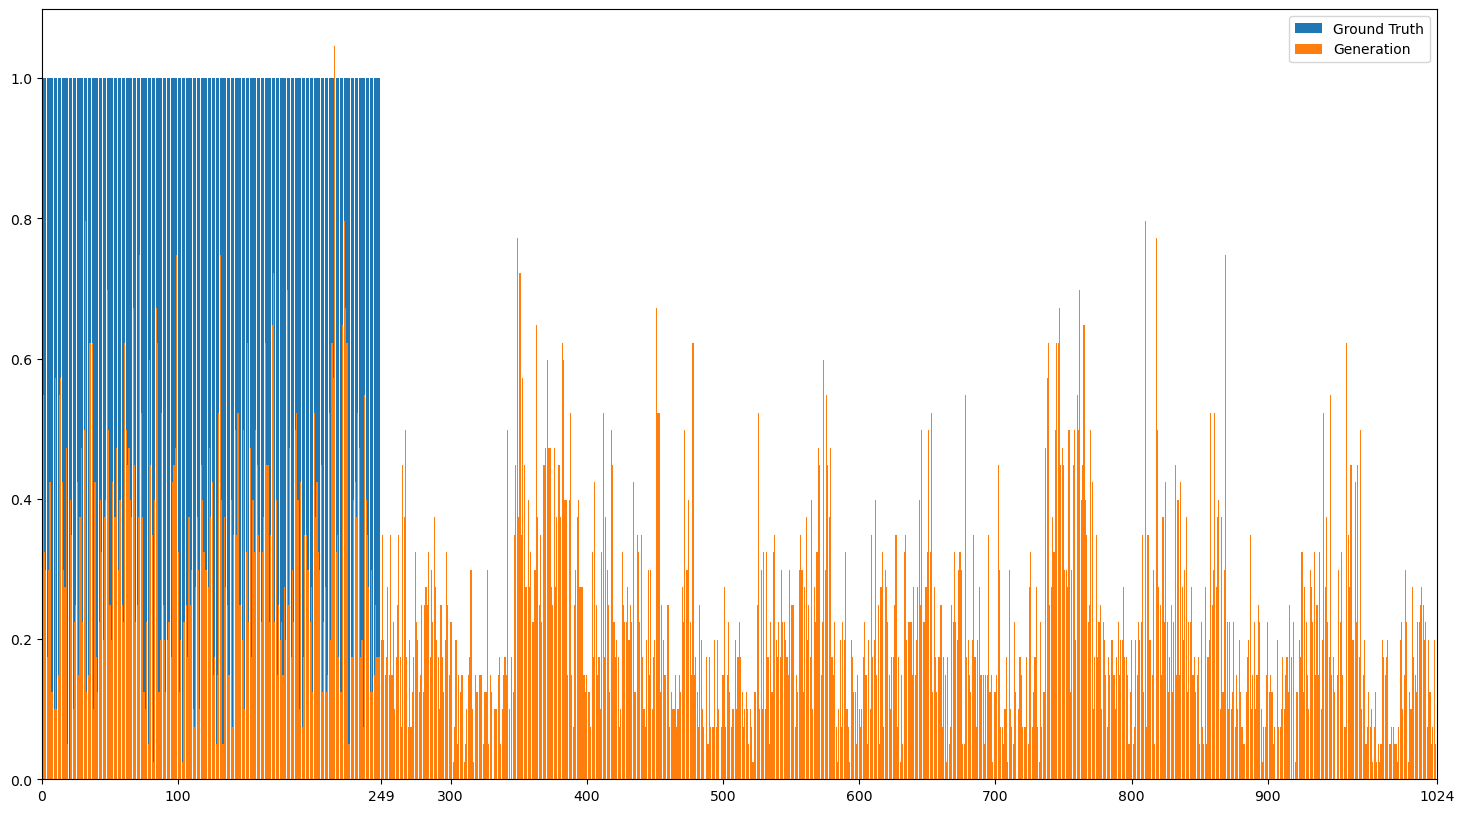

In [61]:
# visualization
x_lim = reordered_set.shape[1]
n_ticks = 8
xtick = np.arange(0,x_lim,int(x_lim/n_ticks/100+0.5)*100)
xtick[np.argmin(np.abs(xtick - values_d.size))] = values_d.size
xtick[-1] = x_lim

fig, ax = plt.subplots(figsize=(18, 10))
ax.bar(values_d,counts_d,label = "Ground Truth")
ax.bar(values_t,counts_t,label = "Generation")
ax.set(xlim=(0, x_lim), xticks=xtick)
plt.legend()

In [62]:
statistics

{'percent': 0.327,
 'FN': array([20]),
 'n_fn': 1,
 'FP': array([[ 249,  250,  251, ..., 1021, 1022, 1023],
        [   8,   14,    8, ...,    3,    8,    2]], dtype=int64),
 'n_fp': 767}

In [63]:
MSE

0.48498682

'percent': 0.5181, 0.5236; 0.5698,0.6098,0.6213

n_fn': 4,0,0; 4,3,4

'n_fp': 640,653,641; 615,619,599

MSE: 0.3995,0.3457,0.9405; 0.8118,0.7598,0.7739